# **Proyek Akhir Modul 2 - Transaksi Transportasi Umum Transjakarta**

*Oleh: Justify Ester Pasaribu (JCDS 0406 006)*

**Berdasarkan Dataset dari Kaggle yang dapat Diaskes [disini](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction/data), untuk memahami lebih dalam mengenai dataset Public Transportation Transaction Transjakarta. Berikut ini Pemahaman Dasar dari Dataset :**

> **TENTANG DATASET**

Dataset ini adalah simulasi data transaksi Transjakarta, dibuat untuk memfasilitasi analisis dan pengembangan model data. Setiap transaksi memiliki ID unik, informasi kartu pembayaran termasuk bank penerbit, nama pemegang, jenis kelamin, dan tanggal lahir pemegang kartu. Data juga mencakup ID koridor, nama koridor, arah rute, informasi pemberhentian (termasuk garis lintang dan bujur), urutan pemberhentian, waktu tap-in dan tap-out, serta jumlah pembayaran.

> **KONTEKS**

Transjakarta adalah perusahaan transportasi umum di Jakarta, Indonesia, menggunakan bus besar, bus sedang, dan bus mini. Sistem pembayaran menggunakan kartu tap-in dan tap-out. Dataset ini tidak mewakili data transaksi nyata Transjakarta tetapi memberikan kerangka untuk analisis model transportasi umum.

> **KONTEN**

Dataset ini menyediakan informasi terperinci tentang transaksi simulasi, mencakup aspek-aspek seperti rute, waktu perjalanan, dan biaya. Ini berguna untuk menganalisis pola perjalanan penumpang dan efisiensi rute.

> **INSPIRASI**

Dataset ini dapat digunakan untuk memahami dinamika transportasi umum di Jakarta. Analisis ini dapat membantu mengidentifikasi rute yang sibuk, potensi kemacetan, dan preferensi penumpang, serta mendukung perencanaan rute yang lebih efisien.

# `STAKEHOLDER: Divisi Manajemen Operasional TransJakarta`

Memilih Divisi Manajemen Operasional Transjakarta sebagai stakeholder yang tepat berdasarkan dataset Transjakarta adalah pilihan yang sesuai karena:

- **Relevansi Data:** Dataset ini menyediakan informasi mendetail tentang transaksi perjalanan yang sangat berguna untuk manajemen operasional.
- **Fokus pada Operasional:** Divisi ini berfokus pada pengelolaan operasi sehari-hari, efisiensi rute, dan peningkatan kualitas layanan, yang semua aspkenya dapat dianalisis menggunakan dataset Transjakarta.

# `LATAR BELAKANG`

Manajemen Operasional Transjakarta menghadapi tantangan dalam mengoptimalkan operasi dan meningkatkan layanan bagi penumpang. Efisiensi rute, waktu tunggu, kepadatan penumpang, dan pendapatan adalah beberapa area kunci yang membutuhkan perhatian. Dataset Transjakarta menyediakan data transaksi yang dapat digunakan untuk menganalisis aspek-aspek ini dan memberikan wawasan untuk peningkatan layanan.

# `PERNYATAAN MASALAH`

Divisi Manajemen Operasional Transjakarta ingin memahami **bagaimana pola pergerakan penumpang dan faktor-faktor yang mempengaruhinya** untuk meningkatkan efisiensi layanan dan kepuasan pelanggan. Mereka perlu mengoptimalkan jadwal, mengatur alokasi sumber daya, dan mengidentifikasi area untuk peningkatan layanan.

Sebagai seorang *data analyst* akan mencoba menjawab pertanyaan berikut:

**Bagaimana kita dapat menggunakan analisis data untuk memahami dan mengoptimalkan pola pergerakan penumpang, kepadatan rute demi meningkatkan efisiensi operasional dan kepuasan pelanggan Transjakarta?**

----------------------------------------------------------------------------
Berdasarkan pernyataan masalah dijelaskan diatas, berikut ini yang menjadi pertanyaan-pertanyaan yang akurat sesuai dengan pernyataan masalah diatas:

**1. Bagaimana pola pergerakan penumpang di berbagai rute?**
- Justifikasi: Memahami pola ini akan membantu dalam menyesuaikan jadwal dan rute untuk mengurangi waktu tunggu dan penumpang berdesakan.
- Kolom Relevan: tapInTime, tapOutTime, corridorName, direction.
- Bantuan *Data Analyst*: Menganalisis waktu dan frekuensi perjalanan untuk mengidentifikasi rute yang sibuk.

**2. Apakah ada rute yang secara konsisten mengalami kepadatan penumpang?**
- Justifikasi: Mengidentifikasi rute yang padat akan membantu dalam alokasi sumber daya dan armada yang lebih baik.
- Kolom Relevan: transID, corridorName, tapInStops, tapOutStops.
- Bantuan *Data Analyst*: Menghitung jumlah transaksi per rute untuk menentukan kepadatan.

**Analisis dari pertanyaan-pertanyaan ini akan membantu Divisi Manajemen Operasional Transjakarta dalam membuat keputusan yang lebih informatif dan strategis untuk meningkatkan efisiensi operasional dan kepuasan penumpang.**

----------------------------------------------------------------------------

# ***Import Library***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu
#from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

# **Pemahaman Data & Pembersihan Data**

In [2]:
dfjep = pd.read_csv('TransjakartaOriginal.csv')

In [3]:
display(dfjep.head(), dfjep.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [4]:
print("Nama Kolom-kolom pada Dataset:")
print(dfjep.columns)

print("\nTotal Keseluruhan Kolom pada Dataset:", len(dfjep.columns))


Nama Kolom-kolom pada Dataset:
Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

Total Keseluruhan Kolom pada Dataset: 22


----------------------------------------------
Dataset ini berisi terkait Transaksi Transportasi Umum Transjakarta. Ada 22 kolom di dalam dataset `Transjakarta.csv`. Berikut ini penjelasan dari setiap kolom-kolomnya:

1. `transID:` ID transaksi unik untuk setiap transaksi.
2. `payCardID:` Pengidentifikasi utama pelanggan, yaitu kartu yang digunakan sebagai tiket masuk dan keluar.
3. `payCardBank:` Nama bank penerbit kartu pelanggan.
4. `payCardName:` Nama pelanggan yang tertanam di kartu.
5. `payCardSex:` Jenis kelamin pelanggan yang tertanam di kartu.
6. `payCardBirthDate:` Tahun lahir pelanggan.
7. `corridorID:` ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8. `corridorName:` Nama Koridor / Nama Rute yang mencakup awal dan akhir untuk setiap rute.
9. `direction:` 0 untuk pergi, 1 untuk kembali. Arah rute.
10. `tapInStops:` ID pemberhentian masuk (tap in) untuk mengidentifikasi nama pemberhentian.
11. `tapInStopsName:` Nama pemberhentian masuk di mana pelanggan melakukan tap in.
12. `tapInStopsLat:` Lintang dari pemberhentian masuk.
13. `tapInStopsLon:` Bujur dari pemberhentian masuk.
14. `stopStartSeq:` Urutan pemberhentian, misalnya pemberhentian pertama, kedua, dll. Terkait dengan arah.
15. `tapInTime:` Waktu tap in. Tanggal dan waktu.
16. `tapOutStops:` ID pemberhentian keluar (tap out) untuk mengidentifikasi nama pemberhentian.
17. `tapOutStopsName:` Nama pemberhentian keluar di mana pelanggan melakukan tap out.
18. `tapOutStopsLat:` Lintang dari pemberhentian keluar.
19. `tapOutStopsLon:` Bujur dari pemberhentian keluar.
20. `stopEndSeq:` Urutan pemberhentian, misalnya pemberhentian pertama, kedua, dll. Terkait dengan arah.
21. `tapOutTime:` Waktu tap out. Tanggal dan waktu.
22. `payAmount:` Jumlah yang dibayar pelanggan. Beberapa gratis, beberapa tidak.
----------------------------------------------

1. **Identitas Pembayaran dan Pengguna Kartu:**
- `payCardID:` ID kartu pembayaran.
- `payCardBank:`Bank penerbit kartu.
- `payCardName:`Nama pemegang kartu.
- `payCardSex:` Jenis kelamin pemegang kartu.
- `payCardBirthDate:` Tanggal lahir pemegang kartu.

2. **Informasi Koridor:**
- `corridorID:` ID koridor bus.
- `corridorName:` Nama koridor bus.

3. **Informasi Naik dan Turun:**
- `tapInStops dan tapOutStops:` ID pemberhentian tempat penumpang naik dan turun.
- `tapInStopsName dan tapOutStopsName:` Nama pemberhentian tempat penumpang naik dan turun.
- `tapInStopsLat, tapInStopsLon, tapOutStopsLat, dan tapOutStopsLon:` Koordinat geografis (latitude dan longitude) pemberhentian tempat penumpang naik dan turun.

4. **Informasi Waktu dan Urutan Pemberhentian:**
- `tapInTime dan tapOutTime:` Waktu ketika penumpang men-tap in dan men-tap out.
- `stopStartSeq dan stopEndSeq:` Urutan pemberhentian tempat penumpang naik dan turun.

5. **Informasi Tarif:**
- `payAmount:` Jumlah tarif yang dibayarkan.

6. **Informasi Tambahan:**
- `transID:` ID transaksi.
- `direction:` Arah perjalanan.

In [5]:
dfjep.info()
print(f'\nJumlah baris dan kolom di dataset Transjakarta adalah {dfjep.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [6]:
display(dfjep.describe(), dfjep.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [7]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in dfjep.columns :
    listItem.append( [col, dfjep[col].nunique(), dfjep[col].unique()])

tabelJEP_Desc1 = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelJEP_Desc1

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

> **Interprestasi :**

- dataset Transjakarta memiliki 22 kolom dan 37900 baris.
- nama-nama kolom pada dataset inkonsistensi satu sama lain, dan perlu di konsistensi nama-nama kolomnya.
- beberapa kolom memiliki data kosong, dan data kosong pada kolom-kolom tersebut diwakili dnegan data 'nan'.


**Tahapan mengidentifikasi *missing values* pada dataset**

In [8]:
missing_values = dfjep.isnull().sum()
missing_percentage = (dfjep.isnull().sum()/len(dfjep))*100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values']>0]

,Jumlah Missing Values,Persentase (%)
corridorID,1257,3.316623
corridorName,1930,5.092348
tapInStops,1213,3.200528
tapOutStops,2289,6.039578
tapOutStopsName,1344,3.546174
tapOutStopsLat,1344,3.546174
tapOutStopsLon,1344,3.546174
stopEndSeq,1344,3.546174
tapOutTime,1344,3.546174
payAmount,1007,2.656992


**Tahapan visualisasi sebaran *missing values* di dalam dataset**



<Axes: >

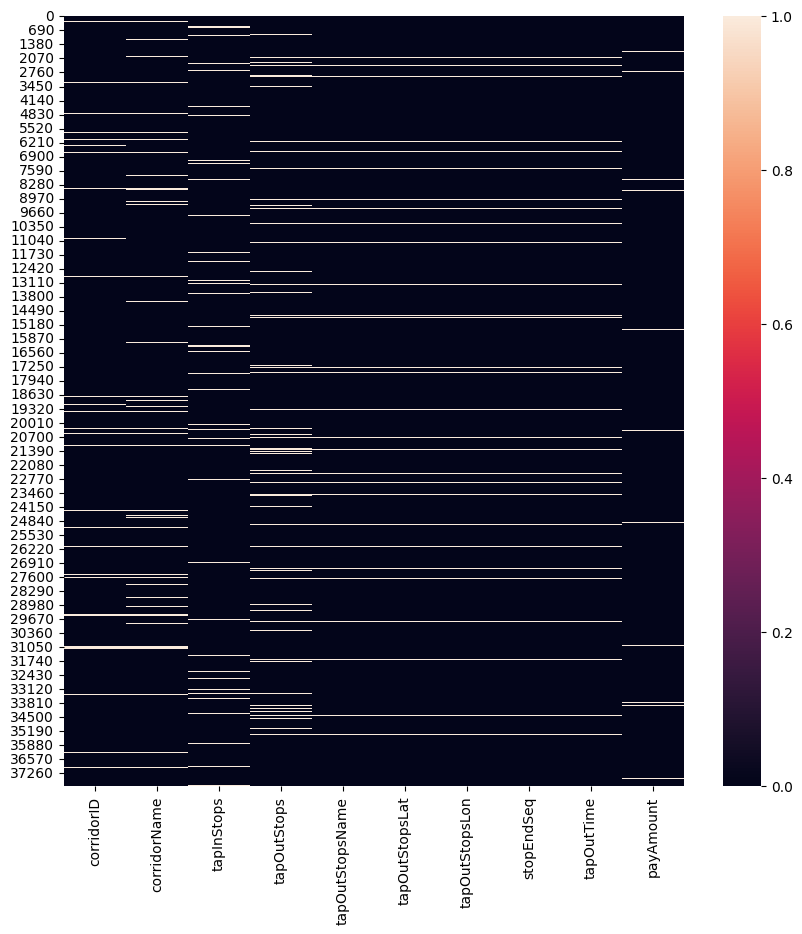

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(dfjep[['corridorID',
                   'corridorName',
                   'tapInStops',
                   'tapOutStops',
                   'tapOutStopsName',
                   'tapOutStopsLat',
                   'tapOutStopsLon',
                   'stopEndSeq',
                   'tapOutTime',
                   'payAmount']].isnull())

> **Interprestasi 1 :**

- pada dataset terdapat 10 kolom yang memiliki data kosong (nan) yang perlu ditangani sebelum ketahapan data analisis.
- *missing values* di kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime`memililki sebaran yang terlihat berkaitan, jika satu data kosong, maka kemungkinan besar data di kolom lainnya juga kosong.

> **Interprestasi 2 :**

- beberapa kolom yang tipe data pada kolom yang perlu diubah, seperti: `payCardID` ubah menjadi object, `direction` ubah menjadi int64, `tapInTime` ubah menjadi datetime, `stopEndSeq` ubah menjadi int64, `tapOutTime` ubah menjadi datetime, `payAmount` ubah menjadi int64
- variables types: **text** (transID, payCardName, corridorID, corridorName, tapInStops, tapInStopsName, tapOutStops, tapOutStopsName) ; **numeric** (payCardID, payCardBirthDate, tapInStopsLat, tapInStopsLon, stopStartSeq, tapOutStopsLat, tapOutStopsLon, stopEndSeq) ; **categorical** (payCardBank, payCardSex, direction, payAmount) ; **datetime** (tapInTime, tapOutTime).

**Tahapan *Handling Missing Values***



1. *Handle Missing Values* pada kolom `corridorID` dan `corridorName` sebagai kolom yang memberikan informasi koridor.

In [10]:
# Menghitung jumlah nilai yang hilang untuk setiap kolom yang relevan
missing_values = dfjep[['corridorID', 'corridorName']].isnull().sum()
missing_values

corridorID      1257
corridorName    1930
dtype: int64

In [11]:
# Membuat tabel kontingensi untuk nilai yang hilang pada kedua kolom
contingency_table = pd.crosstab(dfjep['corridorID'].isnull(), dfjep['corridorName'].isnull())
contingency_table

corridorName,False,True
corridorID,,
False,35838,805
True,132,1125


In [12]:
# Menghitung persentase nilai yang hilang pada kedua kolom
missing_percentage = missing_values / len(dfjep) * 100
missing_percentage

corridorID      3.316623
corridorName    5.092348
dtype: float64

**Interprestasi:**

- berdasarkan kolom `corridorID`: 36.643 entri non-null dari 37.900 total entri, berarti ada 1.257 nilai yang hilang. dan kolom `corridorName`: 35.970 entri non-null dari 37.900 total entri, berarti ada 1.930 nilai yang hilang.  

- berdasarkan tabel kontingensi menunjukkan hubungan antara nilai yang hilang di `corridorID` dan `corridorName`: 35.838 entri dimana kedua kolom memiliki data, 805 entri dimana `corridorID` ada tetapi `corridorName` hilang, 132 entri dimana `corridorID` hilang tetapi `corridorName` ada, dan 1.125 entri dimana kedua kolom hilang.

- untuk mengatasi nilai yang hilang, bisa mempertimbangkan beberapa strategi: **1. Imputasi berdasarkan data yang ada:** Jika `corridorID` hilang tetapi `corridorName` ada, bisa mencari `corridorName` yang sesuai di data untuk menemukan `corridorID` yang terkait. sebaliknya, jika `corridorName` hilang tapi `corridorID` ada, bisa menggunakan `corridorID` untuk menemukan `corridorName`. **2. Hapus entri:** Jika entri hilang pada kedua kolom, bisa mempertimbangkan untuk menghapus baris tersebut, terutama jika persentase data yang hilang tidak signifikan. **3. Penggantian dengan nilai placeholder:** Untuk nilai yang hilang yang tidak bisa diimputasi, bisa menggunakan placeholder seperti "Tidak Diketahui" untuk menjaga integritas data.

In [13]:
# Menyimpulkan nilai yang hilang untuk 'corridorID' dan 'corridorName' jika memungkinkan dan menyelidiki lebih lanjut entri-entri yang memiliki nilai yang hilang

# Langkah 1: Menyimpulkan 'corridorID' yang hilang dari 'corridorName' dan sebaliknya
# Buat pemetaan dari pasangan 'corridorID' dan 'corridorName' yang sudah ada
corridor_mapping = dfjep.dropna(subset=['corridorID', 'corridorName']).drop_duplicates(subset=['corridorID', 'corridorName'])
id_to_name = dict(zip(corridor_mapping['corridorID'], corridor_mapping['corridorName']))
name_to_id = dict(zip(corridor_mapping['corridorName'], corridor_mapping['corridorID']))

# Menyimpulkan 'corridorID' yang hilang dari 'corridorName'
dfjep.loc[dfjep['corridorID'].isnull() & dfjep['corridorName'].notnull(), 'corridorID'] = dfjep['corridorName'].map(name_to_id)

# Menyimpulkan 'corridorName' yang hilang dari 'corridorID'
dfjep.loc[dfjep['corridorName'].isnull() & dfjep['corridorID'].notnull(), 'corridorName'] = dfjep['corridorID'].map(id_to_name)

# Langkah 2: Selidiki entri yang tidak memiliki 'corridorID' dan 'corridorName'
both_missing_data = dfjep[dfjep['corridorID'].isnull() & dfjep['corridorName'].isnull()]

# Menampilkan jumlah nilai yang hilang yang diperbarui dan beberapa baris data di mana keduanya masih hilang
updated_missing_values = dfjep[['corridorID', 'corridorName']].isnull().sum()
both_missing_data_head = both_missing_data.head()

updated_missing_values, both_missing_data_head

(corridorID      1125
 corridorName    1125
 dtype: int64,
             transID            payCardID payCardBank            payCardName  \
 7    XTKE052E5E87LN     3587341902618993         dki        Darmanto Rajasa   
 120  MCWO805A6Q66MX     3570416613897992         dki   Gawati Damanik, S.E.   
 240  PTDK452M9A71XF      342370004909630      emoney  Kartika Habibi, S.Psi   
 250  OLZA217B5B95DK  4371940047525876160      brizzi          Zelda Laksita   
 257  GHEY769K9T55WF        4281653494791      online           Zelda Wibowo   
 
     payCardSex  payCardBirthDate corridorID corridorName  direction  \
 7            F              1991        NaN          NaN        1.0   
 120          F              2010        NaN          NaN        0.0   
 240          M              1975        NaN          NaN        0.0   
 250          M              2009        NaN          NaN        1.0   
 257          M              1989        NaN          NaN        0.0   
 
     tapInStops  ... tapI

In [14]:
missing_values = dfjep.isnull().sum()
missing_percentage = (dfjep.isnull().sum()/len(dfjep))*100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values']>0]

,Jumlah Missing Values,Persentase (%)
corridorID,1125,2.968338
corridorName,1125,2.968338
tapInStops,1213,3.200528
tapOutStops,2289,6.039578
tapOutStopsName,1344,3.546174
tapOutStopsLat,1344,3.546174
tapOutStopsLon,1344,3.546174
stopEndSeq,1344,3.546174
tapOutTime,1344,3.546174
payAmount,1007,2.656992


**Interprestasi:**

- disini masih ada *missing values* pada kolom `corridorID` dan `corridorName`, untuk menangani *missing values* ini dipertimbangkan dengan persentase pada nilai hilangnya.

- karena persentase nilai hilang pada kolom `corridorID` dan `corridorName` dibawah 5% maka dapat dilakukan penghapus data pada nilai yang hilang. (1125 nilai yang hilang) nilai yang hilang ini ada nilai yang tidak ada di kedua kolom tersebut.

2. *Handle Missing Values* pada kolom `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, dan `tapOutStopsLon`sebagai kolom yang memberikan informasi naik & turun penumpang.

In [15]:
# Menghapus 1.125 entri di mana 'corridorID' dan 'corridorName' tidak ada
cleaned_data = dfjep.dropna(subset=['corridorID', 'corridorName'])

# Memverifikasi penghapusan dengan memeriksa jumlah nilai baru yang hilang pada 'corridorID' dan 'corridorName'
new_missing_values = cleaned_data[['corridorID', 'corridorName']].isnull().sum()
cleaned_data_shape = cleaned_data.shape  # Periksa bentuk data yang baru

new_missing_values, cleaned_data_shape

(corridorID      0
 corridorName    0
 dtype: int64,
 (36775, 22))

In [16]:
# Menghapus entri di mana 'corridorID' dan 'corridorName' tidak ada
final_cleaned_data = dfjep.dropna(subset=['corridorID', 'corridorName'])

# Memeriksa bentuk data baru dan jumlah nilai yang hilang pada 'corridorID' dan 'corridorName'
new_shape = final_cleaned_data.shape
remaining_missing_values = final_cleaned_data[['corridorID', 'corridorName']].isnull().sum()

new_shape, remaining_missing_values

((36775, 22),
 corridorID      0
 corridorName    0
 dtype: int64)

In [17]:
missing_values = dfjep.isnull().sum()
missing_percentage = (dfjep.isnull().sum()/len(dfjep))*100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values']>0]

,Jumlah Missing Values,Persentase (%)
corridorID,1125,2.968338
corridorName,1125,2.968338
tapInStops,1213,3.200528
tapOutStops,2289,6.039578
tapOutStopsName,1344,3.546174
tapOutStopsLat,1344,3.546174
tapOutStopsLon,1344,3.546174
stopEndSeq,1344,3.546174
tapOutTime,1344,3.546174
payAmount,1007,2.656992


**Interprestasi:**

- karena tidak bisa dilakuakn penghapusan data pada sisa *missing values* pada kolom `corridorID` dan `corridorName` maka akan di lakukan penanganan nilai yang hilang dengan cara mengisi nilai yang hilang dengan nilai yang paling sering muncul atau modus untuk kolom tersebut.

In [18]:
# Menangani nilai yang hilang dengan melakukan imputasi dengan mode (nilai yang paling sering muncul) untuk 'corridorID' dan 'corridorName'

# Hitung moda untuk 'corridorID' dan 'corridorName'
corridor_id_mode = dfjep['corridorID'].mode()[0]
corridor_name_mode = dfjep['corridorName'].mode()[0]

# Mengimputasi nilai yang hilang dengan mode
dfjep['corridorID'].fillna(corridor_id_mode, inplace=True)
dfjep['corridorName'].fillna(corridor_name_mode, inplace=True)

# Verifikasi imputasi dengan memeriksa kembali jumlah nilai yang hilang
imputed_missing_values = dfjep[['corridorID', 'corridorName']].isnull().sum()
corridor_id_mode, corridor_name_mode, imputed_missing_values

('1T',
 'Cibubur - Balai Kota',
 corridorID      0
 corridorName    0
 dtype: int64)

**Interprestasi:**

- sekarang kolom `corridorID` dan `corridorName` sudah tidak memiliki nilai yang hilang.

In [19]:
missing_values = dfjep.isnull().sum()
missing_percentage = (dfjep.isnull().sum()/len(dfjep))*100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values']>0]

,Jumlah Missing Values,Persentase (%)
tapInStops,1213,3.200528
tapOutStops,2289,6.039578
tapOutStopsName,1344,3.546174
tapOutStopsLat,1344,3.546174
tapOutStopsLon,1344,3.546174
stopEndSeq,1344,3.546174
tapOutTime,1344,3.546174
payAmount,1007,2.656992


In [20]:
# Menghitung jumlah nilai yang hilang untuk setiap kolom yang relevan
missing_values = dfjep[['tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']].isnull().sum()
missing_values

tapInStops         1213
tapOutStops        2289
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
dtype: int64

In [21]:
# Memeriksa korelasi antara 'tapOutStopsLat' & 'tapInStopsLat' dan 'tapOutStopsLon' & 'tapInStopsLon'
correlations = dfjep[['tapOutStopsLat', 'tapInStopsLat', 'tapOutStopsLon', 'tapInStopsLon']].corr()
correlations

,tapOutStopsLat,tapInStopsLat,tapOutStopsLon,tapInStopsLon
tapOutStopsLat,1.000000,0.899224,0.016244,0.035634
tapInStopsLat,0.899224,1.000000,0.033296,0.026214
tapOutStopsLon,0.016244,0.033296,1.000000,0.892529
tapInStopsLon,0.035634,0.026214,0.892529,1.000000


**Interprestasi:**

- pada kolom `tapOutStopsLat` memiliki korelasi tinggi dengan `tapInStopsLat` (sekitar 0.90), dan `tapOutStopsLon` juga memiliki korelasi tinggi dengan `tapInStopsLon` (sekitar 0.89). ini menunjukkan bahwa ketika penumpang masuk (tap-in) dan keluar (tap-out) dari halte, lokasi geografis mereka (latitude dan longitude) cenderung sangat berkaitan.

In [22]:
# Buat subset data dengan kolom yang relevan
columns_of_interest = ['tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']
missing_data_subset = dfjep[columns_of_interest]

# Hitung jumlah nilai yang hilang untuk setiap baris dalam subset
missing_data_subset['missing_values_count'] = missing_data_subset.isnull().sum(axis=1)

# Menganalisis distribusi jumlah nilai yang hilang
missing_values_distribution = missing_data_subset['missing_values_count'].value_counts().sort_index()
missing_values_distribution

0    34460
1     2070
2       26
4     1308
5       36
Name: missing_values_count, dtype: int64

**Interprestasi:**

- distribusi jumlah baris dengan jumlah tertentu *missing values* pada kolom yang berhubungan adalah sebagai berikut: 0 *missing values* (34.460 baris), 1 *missing values* (2.070 baris), 2 *missing values* (26 baris), 4 *missing values* (1.308 baris) dan 5 *missing values* (36 baris) ini menunjukkan bahawa sebagian besar baris tidak memiliki *missing values* pada kelompok kolom ini, namun ada sejumlah signifikan yang memiliki satu atau lebih *missing values*.

- untuk menangani *missing values* pada semua kolom yang terkait, dengan strategi berikut ini: **1. Untuk `tapInStops`, `tapOutStops`, dan `tapOutStopsName` (Kolom Teks):** jika `tapInStops` tidak kosong tetapi `tapOutStops` kosong, bisa mengisi `tapOutStops` dengan nilai dari `tapInStops`, dan sebaliknya. karena berasumsi bahwa tap-in dan tap-out biasanya terjadi di lokasi yang sama/berdekatan. dan jika keduanya kosong, akan menggunakan modus dari kolom terkait untuk mengisi nilai yang hilang. Untuk kolom `tapOutStopsName` *missing values* akan diisi berdasarkan modus nama halte untuk setiap nilai unik di `tapOutStops`. **2. Untuk `tapOutStopsLat` dan `tapOutStopsLon` (Kolom Numerik):** jika `tapInStopsLat` dan `tapInStopsLon` tersedia, akan menggunakan regresi linear untuk memprediksi nilai yang hilang berdasarkan korelasi yang tinggi antara kolom-kolom ini dan jika data pada kolom `tapInStopsLat` atau `tapInStopsLon` juga kosong, kita akan menggunakan nilai rata-rata atau median dari kolom `tapOutStopsLat` atau `tapOutStopsLon`.

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Menangani nilai yang hilang untuk 'tapInStops' dan 'tapOutStops'
dfjep['tapOutStops'].fillna(dfjep['tapInStops'], inplace=True)
dfjep['tapInStops'].fillna(dfjep['tapOutStops'], inplace=True)

# Untuk sisa nilai yang hilang pada 'tapInStops' dan 'tapOutStops', gunakan mode dari setiap kolom
mode_tapInStops = dfjep['tapInStops'].mode()[0]
mode_tapOutStops = dfjep['tapOutStops'].mode()[0]
dfjep['tapInStops'].fillna(mode_tapInStops, inplace=True)
dfjep['tapOutStops'].fillna(mode_tapOutStops, inplace=True)

# Menangani nilai yang hilang untuk 'tapOutStopsName' dengan memetakan nama yang paling umum ke 'tapOutStops'
common_names = dfjep.groupby('tapOutStops')['tapOutStopsName'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
dfjep['tapOutStopsName'] = dfjep.apply(lambda row: common_names[row['tapOutStops']] if pd.isnull(row['tapOutStopsName']) else row['tapOutStopsName'], axis=1)

# Mempersiapkan data untuk model regresi untuk 'tapOutStopsLat' dan 'tapOutStopsLon'
missing_lat = dfjep['tapOutStopsLat'].isnull()
missing_lon = dfjep['tapOutStopsLon'].isnull()

# Mengisi nilai yang hilang pada 'tapInStopsLat' dan 'tapInStopsLon' dengan nilai rata-ratanya
imputer_numeric = SimpleImputer(strategy='mean')
dfjep['tapInStopsLat'] = imputer_numeric.fit_transform(dfjep[['tapInStopsLat']])
dfjep['tapInStopsLon'] = imputer_numeric.fit_transform(dfjep[['tapInStopsLon']])

missing_lat = dfjep['tapOutStopsLat'].isnull()
missing_lon = dfjep['tapOutStopsLon'].isnull()
regressor_lat = LinearRegression()
regressor_lon = LinearRegression()

# Regresi Linier untuk 'tapOutStopsLat'
if missing_lat.any():
    regressor_lat.fit(dfjep.loc[~missing_lat, ['tapInStopsLat']], dfjep.loc[~missing_lat, 'tapOutStopsLat'])
    dfjep.loc[missing_lat, 'tapOutStopsLat'] = regressor_lat.predict(dfjep.loc[missing_lat, ['tapInStopsLat']])

# Regresi Linier untuk 'tapOutStopsLon'
if missing_lon.any():
    regressor_lon.fit(dfjep.loc[~missing_lon, ['tapInStopsLon']], dfjep.loc[~missing_lon, 'tapOutStopsLon'])
    dfjep.loc[missing_lon, 'tapOutStopsLon'] = regressor_lon.predict(dfjep.loc[missing_lon, ['tapInStopsLon']])

# Periksa jumlah nilai yang hilang yang diperbarui untuk kolom yang ditentukan
updated_missing_values = dfjep[['tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']].isnull().sum()
updated_missing_values

tapInStops           0
tapOutStops          0
tapOutStopsName    325
tapOutStopsLat       0
tapOutStopsLon       0
dtype: int64

In [24]:
missing_values = dfjep.isnull().sum()
missing_percentage = (dfjep.isnull().sum()/len(dfjep))*100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values']>0]

,Jumlah Missing Values,Persentase (%)
tapOutStopsName,325,0.857520
stopEndSeq,1344,3.546174
tapOutTime,1344,3.546174
payAmount,1007,2.656992


In [25]:
# Membuat tabel kontingensi untuk nilai yang hilang pada kedua kolom
contingency_table = pd.crosstab(dfjep['tapOutStops'].isnull(), dfjep['tapOutStopsName'].isnull())
contingency_table

tapOutStopsName,False,True
tapOutStops,,
False,37575,325


In [26]:
# Tentukan fungsi untuk menangani nilai yang hilang berdasarkan grup
def fill_missing_names(group):
   # Jika grup tidak kosong dan memiliki nilai mode, isi nilai yang hilang dengan mode
    if not group['tapOutStopsName'].isnull().all() and not group['tapOutStopsName'].mode().empty:
        return group['tapOutStopsName'].fillna(group['tapOutStopsName'].mode()[0])
    return group['tapOutStopsName']

# Kelompokkan data berdasarkan 'tapOutStops', 'tapOutStopsLat', dan 'tapOutStopsLon' dan terapkan fungsinya
dfjep['tapOutStopsName'] = dfjep.groupby(['tapOutStops', 'tapOutStopsLat', 'tapOutStopsLon']).apply(fill_missing_names).reset_index(level=[0,1,2], drop=True)

# Periksa jumlah nilai yang tersisa di 'tapOutStopsName'
remaining_missing_after_group_imputation = dfjep['tapOutStopsName'].isnull().sum()
remaining_missing_after_group_imputation

325

In [27]:
import numpy as np

# Tentukan toleransi untuk menganggap pemberhentian sebagai "cukup dekat"
tolerance = 0.001  # sekitar 100 meter

# Menghitung berdasarkan kedekatan geografis  (tapOutStopsLat and tapOutStopsLon)
for index, row in dfjep[dfjep['tapOutStopsName'].isnull()].iterrows():
    # Temukan halte yang cukup dekat
    close_stops = dfjep[
        (np.abs(dfjep['tapOutStopsLat'] - row['tapOutStopsLat']) < tolerance) &
        (np.abs(dfjep['tapOutStopsLon'] - row['tapOutStopsLon']) < tolerance) &
        dfjep['tapOutStopsName'].notnull()
    ]

    # Jika ada perhentian dekat dengan sebuah nama, gunakan nama yang paling umum
    if not close_stops.empty:
        most_common_name = close_stops['tapOutStopsName'].mode()
        if not most_common_name.empty:
            dfjep.at[index, 'tapOutStopsName'] = most_common_name.iloc[0]

# Hitung sisa nilai yang hilang setelah langkah ini
remaining_missing_after_geo_imputation = dfjep['tapOutStopsName'].isnull().sum()
remaining_missing_after_geo_imputation

214

**Interprestasi:**

- untuk sisa 325 *missing values* pada kolom `tapOutStopsName` dilakukan penerapan imputasi berdasarkan lokasi geografis (`tapOutStopsLat` dan `tapOutStopsLon`) dengan toleransi sekitar 100 meter yang dimana berkurang dari 325 menjadi 214 *missing values* berarti beberapa *missing values* berhasil diisi menggunakan informasi geografis dari pemberhentian terdekat.

In [28]:
missing_values = dfjep.isnull().sum()
missing_percentage = (dfjep.isnull().sum()/len(dfjep))*100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values']>0]

,Jumlah Missing Values,Persentase (%)
tapOutStopsName,214,0.564644
stopEndSeq,1344,3.546174
tapOutTime,1344,3.546174
payAmount,1007,2.656992


In [29]:
# Mendefinisikan strategi penanganan nilai yang hilang berdasarkan persentase dan tipe data kolom.
strategies = {
    'tapOutStopsName': ('text', 0.564644),
}

# Fungsi untuk menangani nilai yang hilang
def handle_missing_values(dfjep, column, data_type, percent_missing):
    if percent_missing < 5:
        # Jika persentase nilai yang hilang < 5%, gunakan modus atau median tergantung tipe data
        if data_type in ['text', 'categorical']:
            dfjep[column].fillna(dfjep[column].mode()[0], inplace=True)
        elif data_type == 'numeric':
            dfjep[column].fillna(dfjep[column].median(), inplace=True)
        elif data_type == 'datetime':
            dfjep[column].fillna(method='ffill', inplace=True)
    else:
        # Jika persentase nilai yang hilang >= 5%, gunakan strategi yang lebih kompleks
        # Untuk demonstrasi, kita akan mengisi dengan modus, mean, atau forward fill tergantung tipe data
        if data_type in ['text', 'categorical']:
            dfjep[column].fillna('Unknown', inplace=True)
        elif data_type == 'numeric':
            dfjep[column].fillna(dfjep[column].mean(), inplace=True)
        elif data_type == 'datetime':
            dfjep[column].fillna(method='ffill', inplace=True)

# Menerapkan fungsi penanganan nilai yang hilang untuk setiap kolom yang ditentukan
for column, (data_type, percent_missing) in strategies.items():
    handle_missing_values(dfjep, column, data_type, percent_missing)

# Memeriksa kembali untuk memastikan tidak ada nilai yang hilang tersisa
dfjep.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

**Interprestasi:**

- untuk sisa 214 *missing values* pada kolom `tapOutStopsName` maka dilakukan pendekatan berdasarkan persentase missing value nya yang kurang dari 5% (0.56%) maka dilakukan penangganan *missing values* dengan cara modus karena kolom tapOutStopsName tipe variabelnya adalah *text*.

In [30]:
missing_values = dfjep.isnull().sum()
missing_percentage = (dfjep.isnull().sum()/len(dfjep))*100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values']>0]

,Jumlah Missing Values,Persentase (%)
stopEndSeq,1344,3.546174
tapOutTime,1344,3.546174
payAmount,1007,2.656992


3. *Handle Missing Values* pada kolom `stopEndSeq` dan `tapOutTime` sebagai kolom yang memberikan informasi waktu & urutan pemberhentian.

In [31]:
# Mengonversi 'tapInTime' dan 'tapOutTime' menjadi datetime
dfjep['tapInTime'] = pd.to_datetime(dfjep['tapInTime'], errors='coerce')
dfjep['tapOutTime'] = pd.to_datetime(dfjep['tapOutTime'], errors='coerce')

# Hitung selisih antara 'stopEndSeq' dan 'stopStartSeq'
dfjep['stopSeqDiff'] = dfjep['stopEndSeq'] - dfjep['stopStartSeq']

# Hitung perbedaan waktu antara 'tapOutTime' dan 'tapInTime' dalam menit
dfjep['timeDiffMinutes'] = (dfjep['tapOutTime'] - dfjep['tapInTime']).dt.total_seconds() / 60

# Menganalisis distribusi perbedaan
seq_diff_stats = dfjep['stopSeqDiff'].describe()
time_diff_stats = dfjep['timeDiffMinutes'].describe()

print("Analisis Pola dan Hubungan: stopEndSeq & stopStartSeq")
print()
print(seq_diff_stats)
print("\nAnalisis Pola dan Hubungan: tapOutTime & tapInTime")
print()
print(time_diff_stats)

Analisis Pola dan Hubungan: stopEndSeq & stopStartSeq

count    36556.000000
mean         7.654667
std          7.831177
min          1.000000
25%          2.000000
50%          5.000000
75%         11.000000
max         64.000000
Name: stopSeqDiff, dtype: float64

Analisis Pola dan Hubungan: tapOutTime & tapInTime

count    36556.000000
mean        72.125424
std         28.072912
min         15.000000
25%         51.133333
50%         71.833333
75%         95.800000
max        179.050000
Name: timeDiffMinutes, dtype: float64


**Interprestasi:**

- berdasarkan analisis pola & hubungan diatas untuk mendapatkan cara menangani *missing values* pada kolom stopsEndSeq dan tapOutTime hubungannya dengan kolom-kolom lainnya yang berkaitan.

- hasil analisis pola dan hubungan diketahui bahwa: kolom `stopEndSeq` dan `stopStartSeq` memiliki *rata-rata perbedaan: 7.65 pemberhentian*, *standar deviasi: 7.83 pemberhentian*, *median: 5 pemberhentian*, dan *rentang: 1 hingga 64 pemberhentian*. sedangkan pada kolom `tapOutTime` dan `tapInTime` memilki *rata-rata durasi perjalanan: 72.13 menit*, *standar deviasi: 28.07 meni*, *median: 71.83 menit*, *rentang: 15 hingga 179 menit*.

- oleh karena itu, strategi menangani *missing values* pada kolom `stopEndSeq` bisa menggunakan median/rata-rata perbedaan untuk mengimputasi nilai yang hilang, mengingat distribusinya median mungkin lebih representatif karena lebih tahan terhadap outlier. sedangkan pada kolom `tapOutTime` bisa menggunakan median/rata-rata durasi perjalanan. Sebelum dilakukan imputasi ini perlu memeriksa outlier nya terlebih dahulu untuk perbedaan antara `stopEndSeq` dan `stopStartSeq` (stopSeqDiff). juga perbedaan waktu antara `tapInTime` dan `tapOutTime` (timeDiffMinutes)

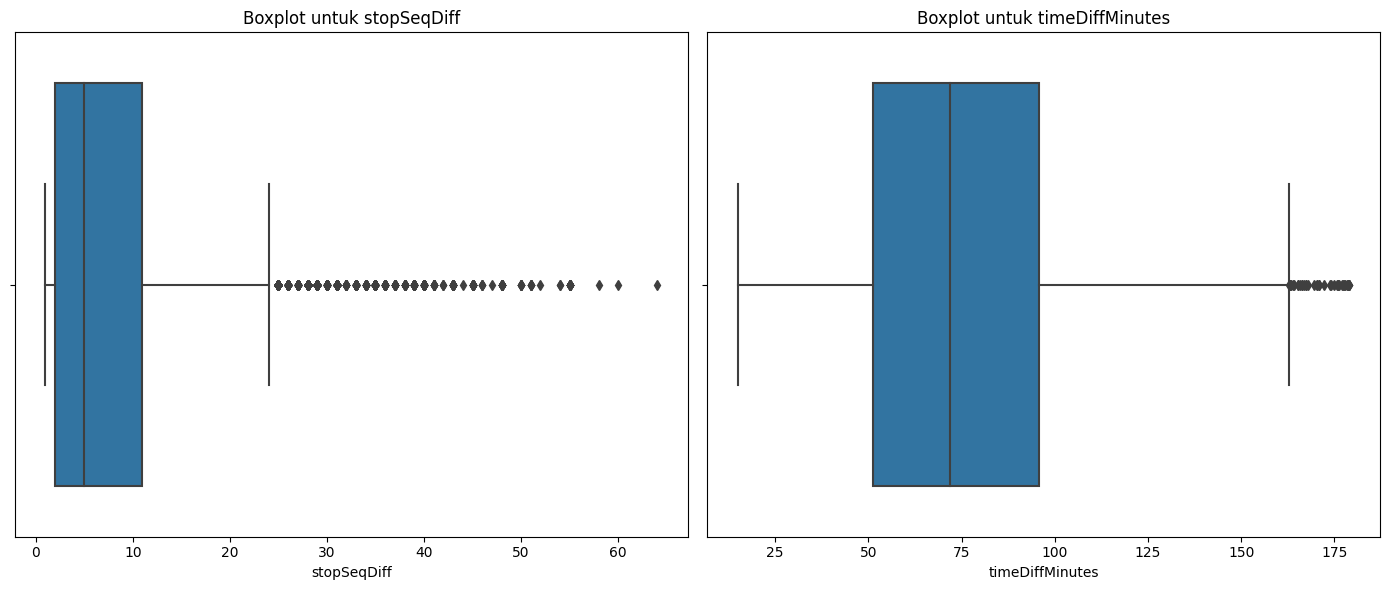

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=dfjep, x='stopSeqDiff')
plt.title('Boxplot untuk stopSeqDiff')

plt.subplot(1, 2, 2)
sns.boxplot(data=dfjep, x='timeDiffMinutes')
plt.title('Boxplot untuk timeDiffMinutes')

plt.tight_layout()
plt.show()

**Interprestasi:**

- `stopSeqDiff`: terdapat beberapa outlier yang jauh dari kuartil atas, menandakan bahwa ada perjalanan dengan jumlah pemberhentian yang jauh lebih tinggi dari yang lain.
- `timeDiffMinutes`: serupa dengan stopSeqDiff ada outlier di sisi atas, menunjukkan beberapa perjalanan yang jauh lebih lama dari rata-rata.

In [33]:
# Hitung skewness dan kurtosis untuk stopSeqDiff dan timeDiffMinutes
skewness_kurtosis = {
    'stopSeqDiff': {
        'Skewness': dfjep['stopSeqDiff'].skew(),
        'Kurtosis': dfjep['stopSeqDiff'].kurtosis()
    },
    'timeDiffMinutes': {
        'Skewness': dfjep['timeDiffMinutes'].skew(),
        'Kurtosis': dfjep['timeDiffMinutes'].kurtosis()
    }
}

skewness_kurtosis

{'stopSeqDiff': {'Skewness': 1.8814017613831582,
  'Kurtosis': 4.285667218844798},
 'timeDiffMinutes': {'Skewness': -0.002506231529562893,
  'Kurtosis': -0.9156852784872873}}

**Interprestasi:**

- `stopSeqDiff` (Perbedaan Urutan Pemberhentian):
Skewness: 1.88, yang menunjukkan distribusi yang condong ke kanan. Ini berarti ada lebih banyak nilai di sisi rendah, tetapi beberapa nilai tinggi (outlier) mempengaruhi rata-rata.
Kurtosis: 4.29, yang lebih tinggi dari 0, menunjukkan distribusi yang lebih berpuncak (leptokurtic) dibandingkan dengan distribusi normal. Ini mengindikasikan adanya outlier yang signifikan.

- `timeDiffMinutes` (Perbedaan Waktu Perjalanan):
Skewness: -0.0025, yang mendekati 0, menunjukkan distribusi yang cukup simetris.
Kurtosis: -0.92, yang lebih rendah dari 0, menunjukkan distribusi yang lebih rata (platykurtic) dibandingkan dengan distribusi normal. Ini bisa menunjukkan bahwa ekor distribusi kurang ekstrim.

In [34]:
# Imputasi untuk 'stopEndSeq' menggunakan median 'stopSeqDiff'
median_stop_seq_diff = dfjep['stopSeqDiff'].median()

# Mengidentifikasi baris-baris di mana 'stopEndSeq' tidak ada dan 'stopStartSeq' tersedia
missing_stop_end_seq = dfjep[dfjep['stopEndSeq'].isnull() & dfjep['stopStartSeq'].notnull()]

# Mengimput nilai yang hilang untuk 'stopEndSeq'
dfjep.loc[missing_stop_end_seq.index, 'stopEndSeq'] = missing_stop_end_seq['stopStartSeq'] + median_stop_seq_diff

# Imputasi untuk 'tapOutTime' menggunakan median 'timeDiffMinutes'
median_time_diff_minutes = dfjep['timeDiffMinutes'].median()

# Mengidentifikasi baris di mana 'tapOutTime' tidak ada dan 'tapInTime' tersedia
missing_tap_out_time = dfjep[dfjep['tapOutTime'].isnull() & dfjep['tapInTime'].notnull()]

# Mengimputasi nilai yang hilang untuk 'tapOutTime'
dfjep.loc[missing_tap_out_time.index, 'tapOutTime'] = missing_tap_out_time['tapInTime'] + pd.to_timedelta(median_time_diff_minutes, unit='m')

# Hitung jumlah nilai yang tersisa untuk kedua kolom
remaining_missing = dfjep[['stopEndSeq', 'tapOutTime']].isnull().sum()
remaining_missing

stopEndSeq    0
tapOutTime    0
dtype: int64

**Interprestasi:**

Berdasarkan analisis sebelumnya, kita akan menangani missing values pada kolom `stopEndSeq` dan `tapOutTime` dengan strategi berikut:

- **Untuk stopEndSeq (Numerik):**
Menggunakan Median Perbedaan dengan menggunakan median dari stopSeqDiff (perbedaan antara stopEndSeq dan stopStartSeq) untuk mengimputasi missing values pada stopEndSeq. Ini karena distribusinya yang condong dan adanya outlier, yang membuat median menjadi pilihan yang lebih tahan terhadap nilai ekstrim daripada rata-rata.

- **Untuk tapOutTime (Datetime):**
Menggunakan Median Durasi Perjalanan dengan menambahkan median dari timeDiffMinutes (perbedaan waktu antara tapInTime dan tapOutTime) ke tapInTime yang ada untuk mengestimasi dan mengimputasi missing values pada tapOutTime.

In [35]:
missing_values = dfjep.isnull().sum()
missing_percentage = (dfjep.isnull().sum()/len(dfjep))*100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values']>0]

,Jumlah Missing Values,Persentase (%)
payAmount,1007,2.656992
stopSeqDiff,1344,3.546174
timeDiffMinutes,1344,3.546174


In [36]:
dfjep.drop(columns=['stopSeqDiff','timeDiffMinutes'],inplace=True)

In [37]:
missing_values = dfjep.isnull().sum()
missing_percentage = (dfjep.isnull().sum()/len(dfjep))*100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values']>0]

,Jumlah Missing Values,Persentase (%)
payAmount,1007,2.656992


In [38]:
from numpy.random import choice

remaining_missing_pay_amount = dfjep['payAmount'].isnull().sum()

# Hitung distribusi nilai 'payAmount' yang tidak hilang
pay_amount_distribution = dfjep['payAmount'].dropna().value_counts(normalize=True)

# Sampel dari distribusi untuk jumlah nilai yang hilang
values_to_impute = choice(pay_amount_distribution.index, size=remaining_missing_pay_amount, p=pay_amount_distribution.values)

# Mengimputasi nilai yang hilang di 'payAmount' berdasarkan distribusi yang dihitung
dfjep.loc[dfjep['payAmount'].isnull(), 'payAmount'] = values_to_impute

# Hitung jumlah nilai yang tersisa untuk 'payAmount' setelah imputasi
remaining_missing_pay_amount_after_distribution = dfjep['payAmount'].isnull().sum()
remaining_missing_pay_amount_after_distribution

0

In [39]:
dfjep.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [40]:
dfjep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        37900 non-null  object        
 7   corridorName      37900 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        37900 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

In [41]:
dfjep.isnull().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

**Tahapan Identifikasi Konsistensi Tipe Data dengan Sample Data**

In [42]:
dfjep.dtypes

transID                     object
payCardID                    int64
payCardBank                 object
payCardName                 object
payCardSex                  object
payCardBirthDate             int64
corridorID                  object
corridorName                object
direction                  float64
tapInStops                  object
tapInStopsName              object
tapInStopsLat              float64
tapInStopsLon              float64
stopStartSeq                 int64
tapInTime           datetime64[ns]
tapOutStops                 object
tapOutStopsName             object
tapOutStopsLat             float64
tapOutStopsLon             float64
stopEndSeq                 float64
tapOutTime          datetime64[ns]
payAmount                  float64
dtype: object

- ada beberapa kolom yang perlu diubah tipe data untuk menyesuaikan konsistensi tipe data dengan sample data pada kolom.

- kolom-kolom yang perlu diubah adalah: `payCardID` diubah dari int64 menjadi object, `direction` diubah dari float64 menjadi int64, `tapInTime` dan `tapOutTime` diubah dari object menjadi datetime, `stopEndSeq` diubah dari float64 menjadi int64, dan `payAmount` dari float64 menjadi int64.

In [43]:
import pandas as pd

# Mendefinisikan transformasi untuk setiap kolom
def transform_data(dfjep):
    dfjep = dfjep.copy()

    # Mentransformasi kolom numerik
    numeric_cols = ['payCardID', 'payCardBirthDate', 'tapInStopsLat', 'tapInStopsLon',
                    'stopStartSeq', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq']
    for col in numeric_cols:
        dfjep[col] = pd.to_numeric(dfjep[col], errors='coerce')
        #dfjep[col].fillna(dfjep[col].median(), inplace=True)

    # Mentransformasi kolom numerik
    text_cols = ['transID', 'payCardName', 'corridorID', 'corridorName',
                 'tapInStops', 'tapInStopsName', 'tapOutStops', 'tapOutStopsName']
    for col in text_cols:
        dfjep[col] = dfjep[col].astype(str)

    # Mentransformasi kolom kategorikal
    categorical_cols = ['payCardBank', 'payCardSex', 'direction', 'payAmount']
    for col in categorical_cols:
        dfjep[col] = dfjep[col].astype('category')
        #dfjep[col].fillna(dfjep[col].mode()[0], inplace=True)

    # Mentransformasi kolom datetime
    datetime_cols = ['tapInTime', 'tapOutTime']
    for col in datetime_cols:
        dfjep[col] = pd.to_datetime(dfjep[col], errors='coerce')

    return dfjep

# Mentransformasi data
transformed_data = transform_data(dfjep)

# Periksa tipe data yang ditransformasikan dan beberapa baris pertama
transformed_data.info(), transformed_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  category      
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  category      
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        37900 non-null  object        
 7   corridorName      37900 non-null  object        
 8   direction         37900 non-null  category      
 9   tapInStops        37900 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

(None,
           transID         payCardID payCardBank      payCardName payCardSex  \
 0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
 1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
 2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
 3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
 4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   
 
    payCardBirthDate corridorID                              corridorName  \
 0              2008          5                     Matraman Baru - Ancol   
 1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
 2              1992        R1A                        Pantai Maju - Kota   
 3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
 4              1982         12                     Tanjung Priok - Pluit   
 
   direction tapInStops  ... tapInStopsLon  sto

---

In [44]:
# 1. ubah tipe data pada kolom `payAmount`(variabel types: categorical)

dfjep['payAmount'] = dfjep['payAmount'].astype(int)


In [45]:
# 2. ubah tipe data pada kolom `stopEndSeq`(variabel types: numeric)

dfjep['stopEndSeq'] = dfjep['stopEndSeq'].astype(int)

In [46]:
# 3. ubah tipe data pada kolom `direction`(variabel types: categorical)

dfjep['direction'] = dfjep['direction'].astype(int)

In [47]:
# 4. ubah tipe data pada kolom `payCardID`

dfjep['payCardID'] = dfjep['payCardID'].astype(object)

In [48]:
dfjep.dtypes

transID                     object
payCardID                   object
payCardBank                 object
payCardName                 object
payCardSex                  object
payCardBirthDate             int64
corridorID                  object
corridorName                object
direction                    int64
tapInStops                  object
tapInStopsName              object
tapInStopsLat              float64
tapInStopsLon              float64
stopStartSeq                 int64
tapInTime           datetime64[ns]
tapOutStops                 object
tapOutStopsName             object
tapOutStopsLat             float64
tapOutStopsLon             float64
stopEndSeq                   int64
tapOutTime          datetime64[ns]
payAmount                    int64
dtype: object

**Interprestasi:**

- semua tipe data pada dataset sudah sesuai dengan sample data dan sudah sesuai untuk tahapan analisis selanjutnya.

- kemudian, karena dilihat bahwa nama-nama kolom pada dataset belum konsistensi satu sama lain. maka perlu dilakukan tahapan konsistensi untuk setiap nama kolom agar bisa mempermudah ke tahapan analisis.

**Tahapan Identifikasi Konsistensi Nama-nama Kolom**

In [49]:
# Fungsi untuk memeriksa apakah nama kolom dalam format yang konsisten
def is_inconsistent_format(col_name):
    # Format yang dianggap tidak konsisten: tidak snake_case dan tidak camelCase
    return not ("_" in col_name or col_name.islower() or col_name.isupper())

# Mencari kolom yang formatnya tidak konsisten
inconsistent_columns = [col for col in dfjep.columns if is_inconsistent_format(col)]

# Menampilkan nama kolom yang formatnya tidak konsisten
inconsistent_columns

['transID',
 'payCardID',
 'payCardBank',
 'payCardName',
 'payCardSex',
 'payCardBirthDate',
 'corridorID',
 'corridorName',
 'tapInStops',
 'tapInStopsName',
 'tapInStopsLat',
 'tapInStopsLon',
 'stopStartSeq',
 'tapInTime',
 'tapOutStops',
 'tapOutStopsName',
 'tapOutStopsLat',
 'tapOutStopsLon',
 'stopEndSeq',
 'tapOutTime',
 'payAmount']

In [50]:
# Memperbarui kode untuk mengecek kolom yang formatnya tidak konsisten

# Fungsi untuk memeriksa apakah nama kolom dalam format yang konsisten
def is_inconsistent_format(col_name):
    # Format yang dianggap tidak konsisten: tidak snake_case dan tidak camelCase
    return not ("_" in col_name or col_name.islower() or col_name.isupper())

# Mencari kolom yang formatnya tidak konsisten
inconsistent_columns = [col for col in dfjep.columns if is_inconsistent_format(col)]

# Menampilkan nama kolom yang formatnya tidak konsisten atau pesan jika semuanya konsisten
if inconsistent_columns:
    inconsistent_columns
else:
    print("Nama Kolom-kolom Sudah Konsisten")

In [51]:
# Mengubah semua nama kolom menjadi huruf kecil (lower case)

# Mengubah nama kolom
dfjep.columns = [col.lower() for col in dfjep.columns]

# Menampilkan nama kolom yang telah diubah
dfjep.columns

Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
       'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
       'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
       'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
       'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
       'payamount'],
      dtype='object')

In [52]:
# Memperbarui kode untuk mengecek kolom yang formatnya tidak konsisten

# Fungsi untuk memeriksa apakah nama kolom dalam format yang konsisten
def is_inconsistent_format(col_name):
    # Format yang dianggap tidak konsisten: tidak snake_case dan tidak camelCase
    return not ("_" in col_name or col_name.islower() or col_name.isupper())

# Mencari kolom yang formatnya tidak konsisten
inconsistent_columns = [col for col in dfjep.columns if is_inconsistent_format(col)]

# Menampilkan nama kolom yang formatnya tidak konsisten atau pesan jika semuanya konsisten
if inconsistent_columns:
    inconsistent_columns
else:
    print("Nama Kolom-kolom Sudah Konsisten")

Nama Kolom-kolom Sudah Konsisten


In [53]:
dfjep.columns

Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
       'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
       'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
       'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
       'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
       'payamount'],
      dtype='object')

In [54]:
dfjep.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,3500
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,3500
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,3500
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,3500
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,3500


**Interprestasi:**

- setiap nama-nama kolom sudah konsistensi satu sama lain dimana semua nama-nama kolom dijadikan *lowercase*

In [55]:
dfjep.dtypes

transid                     object
paycardid                   object
paycardbank                 object
paycardname                 object
paycardsex                  object
paycardbirthdate             int64
corridorid                  object
corridorname                object
direction                    int64
tapinstops                  object
tapinstopsname              object
tapinstopslat              float64
tapinstopslon              float64
stopstartseq                 int64
tapintime           datetime64[ns]
tapoutstops                 object
tapoutstopsname             object
tapoutstopslat             float64
tapoutstopslon             float64
stopendseq                   int64
tapouttime          datetime64[ns]
payamount                    int64
dtype: object

In [56]:
# dfjep.to_csv('TransjakartaCleaned(1).csv', index=False)

**Tahapan Identifikasi Duplikat pada Dataset**

In [57]:
dfjep.duplicated().sum()

0

In [58]:
dfjep.apply(lambda x: x.duplicated().sum())

transid                 0
paycardid           35900
paycardbank         37894
paycardname         35907
paycardsex          37898
paycardbirthdate    37833
corridorid          37679
corridorname        37684
direction           37898
tapinstops          35069
tapinstopsname      35298
tapinstopslat       35313
tapinstopslon       35442
stopstartseq        37833
tapintime             821
tapoutstops         35153
tapoutstopsname     35652
tapoutstopslat      34842
tapoutstopslon      34952
stopendseq          37826
tapouttime            648
payamount           37897
dtype: int64

**Interprestasi:**

- untuk setiap keseluruhan dataset tidak memiliki duplikat data

- untuk setiap kolom memiliki duplikat data yang dapat diasumsikan bahwa duplikat data tersebut menunjukkan penggunaan berulang dari penumpang transjakarta.

**Tahapan Identifikasi Outlier pada Dataset**

In [59]:
dfjep.dtypes

transid                     object
paycardid                   object
paycardbank                 object
paycardname                 object
paycardsex                  object
paycardbirthdate             int64
corridorid                  object
corridorname                object
direction                    int64
tapinstops                  object
tapinstopsname              object
tapinstopslat              float64
tapinstopslon              float64
stopstartseq                 int64
tapintime           datetime64[ns]
tapoutstops                 object
tapoutstopsname             object
tapoutstopslat             float64
tapoutstopslon             float64
stopendseq                   int64
tapouttime          datetime64[ns]
payamount                    int64
dtype: object

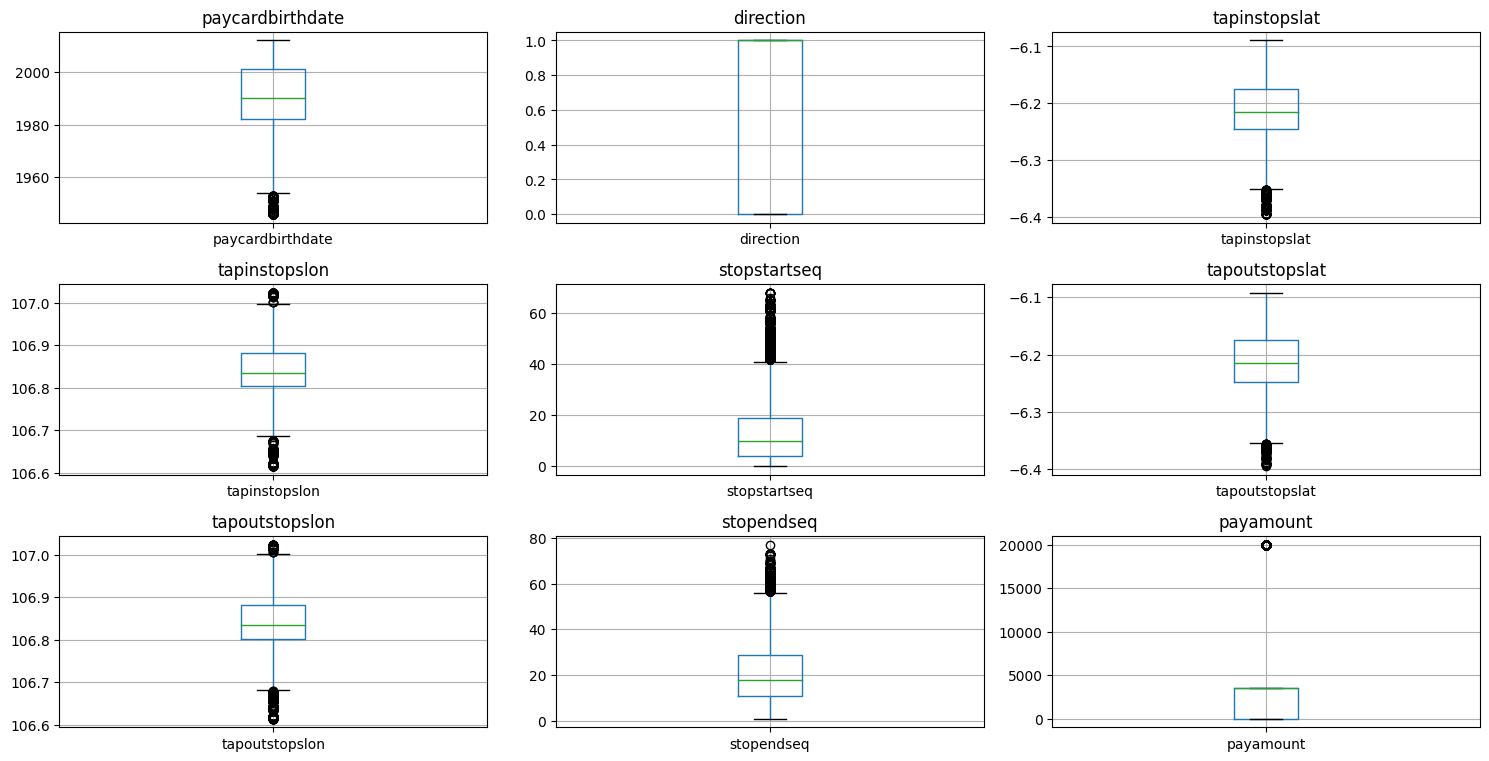

In [60]:
import matplotlib.pyplot as plt

# Mengidentifikasi kolom numerik yang dapat memiliki outlier
numerical_columns = dfjep.select_dtypes(include=['int64', 'float64']).columns

# Membuat boxplots  untuk setiap kolom numerik untuk mengidentifikasi outlier secara visual
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    dfjep.boxplot(col)
    plt.title(col)
plt.tight_layout()
plt.show()

**Interprestasi & Insight:**

- **paycardbirthdate:** boxplot ini menunjukkan distribusi tahun kelahiran, dengan median sekitar tahun 1980-an. Data tampaknya condong ke kiri, menunjukkan bahwa ada lebih banyak individu yang lebih muda (lahir belakangan) dalam kumpulan data ini. Outlier menunjukkan keberadaan individu yang jauh lebih tua.

- **tapinstopslon** dan **tapoutstopslon:** boxplot ini tampaknya merepresentasikan koordinat bujur untuk lokasi "tap in" dan "tap out", kemungkinan dari sistem transportasi umum. Kedua distribusi serupa, terkumpul rapat di sekitar median yang sedikit di atas 106.7, menunjukkan sebagian besar tap in dan tap out terjadi dalam area geografis yang kecil. Ada beberapa outlier, menunjukkan beberapa lokasi tap yang jauh dari area pusat.

- **direction:** boxplot ini memiliki distribusi biner (nilai dekat 0 dan 1), mungkin menunjukkan dua arah perjalanan atau jenis variabel ya/tidak. Distribusi cukup merata, dengan setengah dari observasi memiliki nilai yang lebih rendah dan setengah lainnya nilai yang lebih tinggi.

- **stopstartseq** dan **stopendseq:** ini bisa mewakili nomor urut untuk pemberhentian di mana penumpang mulai dan mengakhiri perjalanan mereka. Kedua memiliki distribusi serupa dengan mayoritas awal dan akhir terjadi di pemberhentian dengan nomor urut di bawah 20. Ada outlier, menunjukkan bahwa beberapa perjalanan dimulai atau diakhiri di pemberhentian dengan nomor urut yang lebih tinggi.

- **tapinstopslat** dan **tapoutstopslat:** boxplot ini kemungkinan menunjukkan koordinat lintang untuk lokasi tap-in dan tap-out, serupa dengan koordinat bujur. Distribusi kembali terkumpul rapat dengan median sekitar -6.3, yang menunjukkan sedikit variasi lintang di antara kebanyakan event tap. Outlier juga ada di sini.

- **payamount:** boxplot ini menunjukkan rentang jumlah pembayaran yang luas, dengan sebagian besar data terkumpul di ujung yang lebih rendah (menunjukkan banyak transaksi kecil) dan median sekitar 2.500. Ada outlier yang signifikan yang menunjukkan beberapa jumlah pembayaran yang sangat tinggi, yang bisa disebabkan oleh berbagai alasan seperti pembelian dalam jumlah banyak atau kesalahan dalam data.

In [61]:
from scipy import stats
import numpy as np

# Mengidentifikasi statistik deskriptif untuk kolom numerik yang diwakili dalam boxplot
descriptive_stats = {}
boxplot_columns = [
    'paycardbirthdate', 'direction', 'tapinstopslon', 'tapoutstopslon',
    'stopstartseq', 'stopendseq', 'tapinstopslat', 'tapoutstopslat', 'payamount'
]

# Menghitung statistik deskriptif
for col in boxplot_columns:
    descriptive_stats[col] = dfjep[col].describe()

# Mengonversi statistik deskriptif ke DataFrame untuk keterbacaan yang lebih baik
descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Mendefinisikan ulang fungsi confidence_interval karena tidak dikenali pada langkah sebelumnya

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data, nan_policy='omit') # kesalahan standar dari rata-rata
    interval = stderr * stats.t.ppf((1 + confidence) / 2., n-1) # Pengganda distribusi-T
    return (mean, mean - interval, mean + interval)

# Untuk statistik inferensial, kami akan menghitung rata-rata dan interval kepercayaan 95% untuk masing-masing kolom ini.
inferential_stats = {}

for col in boxplot_columns:
    inferential_stats[col] = confidence_interval(dfjep[col].dropna())

# Mengonversi statistik inferensial ke DataFrame
inferential_stats_df = pd.DataFrame(inferential_stats, index=['Mean', '95% CI Lower', '95% CI Upper']).T

descriptive_stats_df, inferential_stats_df

(       paycardbirthdate     direction  tapinstopslon  tapoutstopslon  \
 count      37900.000000  37900.000000   37900.000000    37900.000000   
 mean        1990.089314      0.500633     106.841554      106.841253   
 std           13.051482      0.500006       0.060369        0.060781   
 min         1946.000000      0.000000     106.614730      106.614730   
 25%         1982.000000      0.000000     106.803470      106.801870   
 50%         1990.000000      1.000000     106.834830      106.834580   
 75%         2001.000000      1.000000     106.882270      106.882960   
 max         2012.000000      1.000000     107.023950      107.023660   
 
        stopstartseq    stopendseq  tapinstopslat  tapoutstopslat     payamount  
 count  37900.000000  37900.000000   37900.000000    37900.000000  37900.000000  
 mean      13.572480     21.133008      -6.214838       -6.214640   2699.050132  
 std       12.237623     13.760708       0.057911        0.058854   4211.806828  
 min        0

In [62]:
# Sekarang kita akan menangani outlier untuk kolom numerik kecuali untuk 'direction' dan 'payamount'
# yang bersifat kategorikal seperti yang telah disebutkan.
# Kita akan menggunakan metode IQR untuk mendeteksi dan menangani outlier.

# Tentukan fungsi untuk mengganti outlier dengan median kolom
def replace_outliers_with_median(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((series < lower_bound) | (series > upper_bound))
    series[outliers] = series.median()
    return series

# Kolom yang akan diproses
numeric_columns = ['paycardbirthdate', 'tapinstopslon', 'tapoutstopslon',
                   'stopstartseq', 'stopendseq', 'tapinstopslat', 'tapoutstopslat']

# Menerapkan fungsi ke dataframe
for col in numeric_columns:
    dfjep[col] = replace_outliers_with_median(dfjep[col])

# Mari kita periksa statistik kolom-kolom ini setelah penanganan outlier untuk melihat apakah ada perubahan yang terjadi.
dfjep[numeric_columns].describe()

,paycardbirthdate,tapinstopslon,tapoutstopslon,stopstartseq,stopendseq,tapinstopslat,tapoutstopslat
count,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000
mean,1990.461478,106.842389,106.842024,12.027810,20.448391,-6.213150,-6.213104
std,12.435407,0.055558,0.056838,9.917857,12.773488,0.055565,0.056748
min,1954.000000,106.685360,106.681310,0.000000,1.000000,-6.351203,-6.353998
25%,1982.000000,106.805560,106.802366,4.000000,11.000000,-6.243359,-6.245259
50%,1990.000000,106.834830,106.834580,10.000000,18.000000,-6.214587,-6.214718
75%,2001.000000,106.881670,106.882160,17.000000,28.000000,-6.175528,-6.174933
max,2012.000000,106.996830,107.002810,41.000000,56.000000,-6.089429,-6.091746


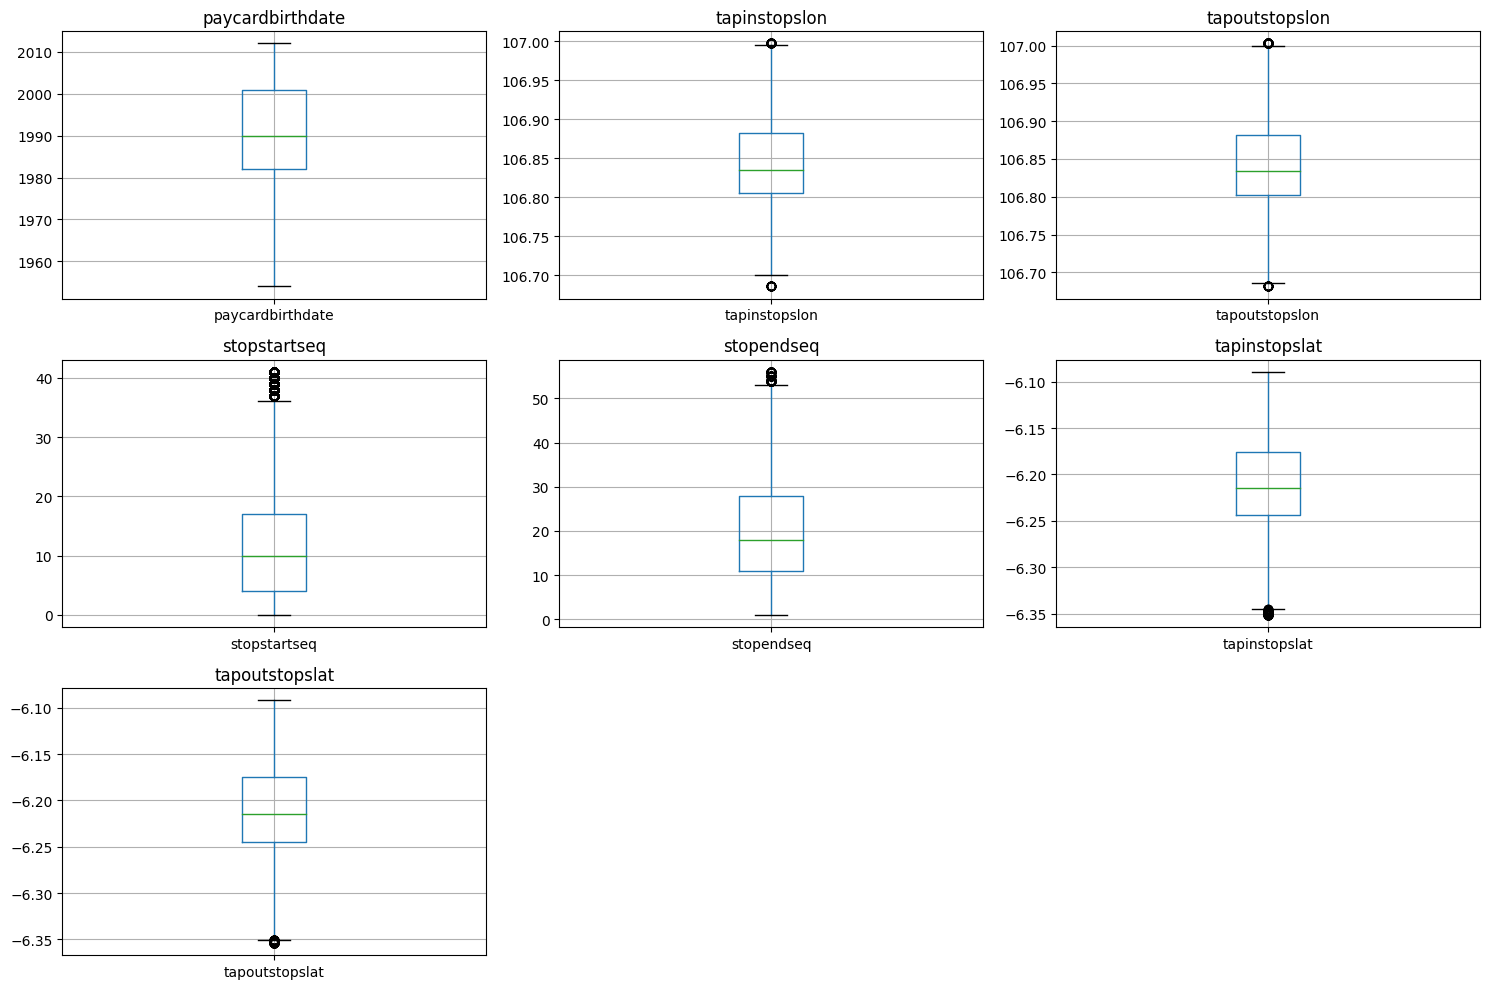

In [63]:
import matplotlib.pyplot as plt

# Tentukan kolom numerik lagi untuk memplot setelah penanganan outlier
numeric_columns_for_plot = ['paycardbirthdate', 'tapinstopslon', 'tapoutstopslon',
                            'stopstartseq', 'stopendseq', 'tapinstopslat', 'tapoutstopslat']

# Boxplot untuk setiap kolom numerik
plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_columns_for_plot, 1):
    plt.subplot(3, 3, i)
    dfjep.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()

**1. Boxplot Setelah Penanganan Outlier:**

- pada variabel `paycardbirthdate`, boxplot menunjukkan bahwa distribusi usia telah dinormalkan dengan outlier yang lebih sedikit. Ini menunjukkan bahwa data lebih terpusat pada kelompok usia tertentu, yang mungkin lebih relevan untuk analisis lebih lanjut.
- variabel geografis `(tapinstopslon, tapoutstopslon, tapinstopslat, tapoutstopslat)` menunjukkan distribusi yang lebih ketat dengan outlier yang lebih sedikit, mengindikasikan bahwa lokasi pemberhentian kini lebih akurat dan konsisten.
- untuk `stopstartseq dan stopendseq`, boxplot menunjukkan bahwa distribusi urutan pemberhentian telah dinormalkan dengan menghilangkan outlier yang sangat tinggi, yang dapat mempengaruhi analisis pola perjalanan.
- kolom `payamount` menunjukkan bahwa transaksi dengan nilai yang sangat tinggi (outlier) telah diatasi, sehingga distribusi pembayaran sekarang lebih seragam dan mungkin lebih mencerminkan struktur tarif yang sebenarnya.

**2. Boxplot Sebelum Penanganan Outlier:**

- pada variabel `paycardbirthdate`, terdapat beberapa outlier yang menunjukkan adanya anggota data dengan usia yang sangat muda atau sangat tua.
- variabel geografis menunjukkan beberapa nilai yang sangat jauh dari pusat distribusi, yang bisa jadi karena kesalahan entri data atau pemberhentian yang sangat jarang terjadi.
- `stopstartseq dan stopendseq` memiliki distribusi yang lebih lebar dengan lebih banyak outlier, menunjukkan adanya variasi yang signifikan dalam jumlah pemberhentian yang dilalui oleh penumpang.
- kolom `payamount` memiliki outlier yang sangat tinggi, mungkin karena adanya kesalahan pencatatan atau kejadian langka seperti penumpang yang membayar biaya yang lebih tinggi dari tarif standar.

# **Insight dan Interpretasi:**

- penanganan outlier membuat distribusi data lebih terpusat dan mengurangi dampak dari nilai-nilai ekstrem yang bisa menyesatkan analisis. Hal ini sangat penting dalam dataset yang digunakan untuk membuat keputusan berbasis data.
- variabel `direction dan payamount` dikategorikan, yang berarti mereka tidak dipengaruhi oleh penanganan outlier. Kolom direction sebagai variabel biner tidak akan memiliki outlier, dan payamount telah dikategorikan menjadi tarif gratis, standar, dan premium, yang mengeliminasi kebutuhan untuk menanganinya sebagai outlier.
- kolom kategorikal seperti `direction dan payamount` harus dianalisis berdasarkan frekuensi pengamatan daripada metrik seperti median atau mean, yang lebih cocok untuk data numerik.
- kesimpulan yang bisa diambil dari penanganan outlier adalah bahwa data sekarang lebih murni dan siap untuk analisis lebih lanjut. Outlier yang dihilangkan atau dikurangi mungkin juga menandakan kesalahan entri data atau kejadian yang tidak biasa yang memerlukan penyelidikan lebih lanjut.

In [64]:
# Berdasarkan visualisasi yang disediakan dan analisis sebelumnya, kita akan menangani outlier di kolom yang ditentukan.
# akan mengganti outlier dengan median kolom menggunakan metode IQR.

# Mendefinisikan kolom yang akan ditangani
columns_to_handle = ['tapinstopslon', 'tapoutstopslon', 'stopstartseq', 'stopendseq', 'tapinstopslat', 'tapoutstopslat']

# Fungsi untuk mengganti outlier dengan nilai median
def handle_outliers(dfjep, col):
    Q1 = dfjep[col].quantile(0.25)
    Q3 = dfjep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Mengganti outlier dengan median
    median_value = dfjep[col].median()
    dfjep[col] = dfjep[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    return dfjep

# Menerapkan fungsi penanganan outlier ke dataframe
for col in columns_to_handle:
    dfjep = handle_outliers(dfjep, col)

# Periksa hasil setelah menangani outlier
outlier_handling_results = dfjep[columns_to_handle].describe()
outlier_handling_results

,tapinstopslon,tapoutstopslon,stopstartseq,stopendseq,tapinstopslat,tapoutstopslat
count,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000
mean,106.842309,106.841722,11.278127,20.223377,-6.212464,-6.212690
std,0.055185,0.056174,8.897915,12.487485,0.054704,0.056229
min,106.699960,106.685360,0.000000,1.000000,-6.345040,-6.350411
25%,106.805570,106.802480,4.000000,11.000000,-6.243292,-6.243474
50%,106.834830,106.834580,10.000000,18.000000,-6.214587,-6.214718
75%,106.881650,106.882140,16.000000,28.000000,-6.175528,-6.174933
max,106.995360,106.999223,36.000000,53.000000,-6.089429,-6.091746


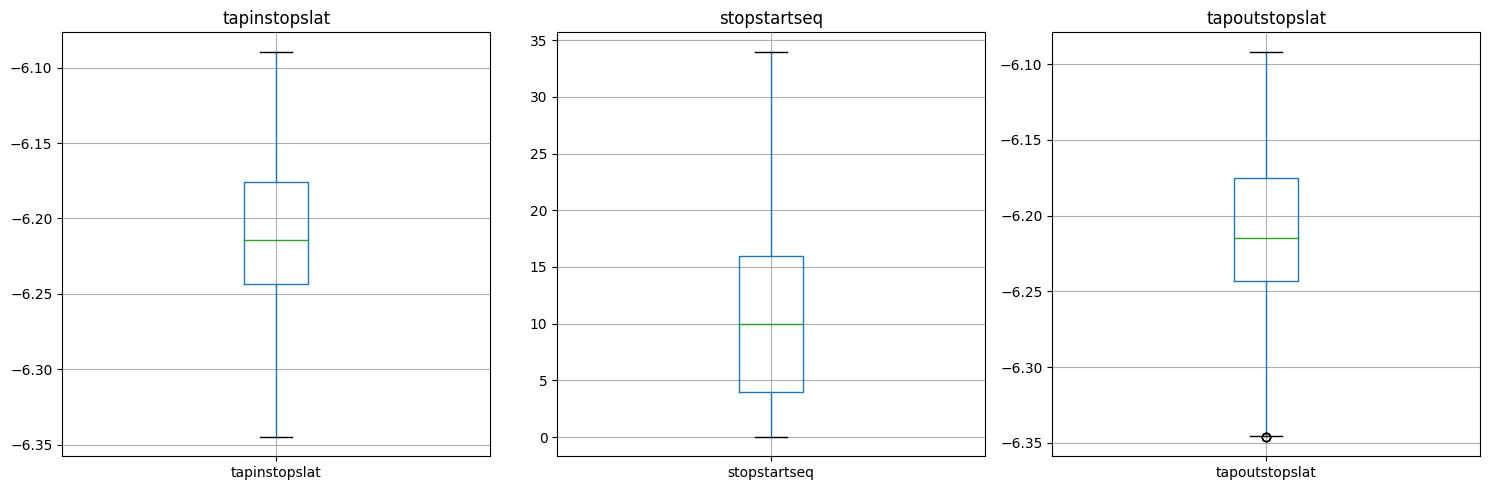

In [65]:
# Menangani outlier yang tersisa di kolom yang ditentukan: 'tapinstopslat', 'stopstartseq', 'tapoutstopslat'
# Kita akan mengganti outlier ini dengan nilai median dari kolom masing-masing menggunakan metode yang sama seperti sebelumnya.

columns_to_handle_remaining = ['tapinstopslat', 'stopstartseq', 'tapoutstopslat']

# Menerapkan fungsi penanganan outlier ke kolom yang tersisa
for col in columns_to_handle_remaining:
    dfjep = handle_outliers(dfjep, col)

# Membuat plot kotak untuk memvisualisasikan kolom setelah penanganan outlier tambahan
plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_handle_remaining, 1):
    plt.subplot(1, 3, i)
    dfjep.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()

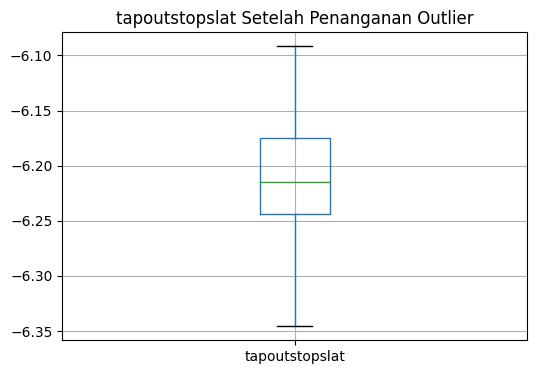

In [66]:
# Menangani outlier yang tersisa di kolom 'tapoutstopslat' dengan menggantinya dengan nilai median.
dfjep = handle_outliers(dfjep, 'tapoutstopslat')

# Membuat boxplot untuk memvisualisasikan kolom 'tapoutstopslat' setelah penanganan outlier tambahan
plt.figure(figsize=(6, 4))
dfjep.boxplot('tapoutstopslat')
plt.title('tapoutstopslat Setelah Penanganan Outlier')
plt.show()

In [67]:
anomaly_report = {}

anomaly_report['missing_values'] = dfjep.isnull().sum()
anomaly_report['duplicates'] = dfjep.duplicated().sum()

numeric_cols = dfjep.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
for col in numeric_cols:
    Q1 = dfjep[col].quantile(0.25)
    Q3 = dfjep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers[col] = dfjep[(dfjep[col] < lower_bound) | (dfjep[col] > upper_bound)][col].count()
anomaly_report['outliers'] = outliers

anomaly_report['data_types'] = dfjep.dtypes

anomaly_report

{'missing_values': transid             0
 paycardid           0
 paycardbank         0
 paycardname         0
 paycardsex          0
 paycardbirthdate    0
 corridorid          0
 corridorname        0
 direction           0
 tapinstops          0
 tapinstopsname      0
 tapinstopslat       0
 tapinstopslon       0
 stopstartseq        0
 tapintime           0
 tapoutstops         0
 tapoutstopsname     0
 tapoutstopslat      0
 tapoutstopslon      0
 stopendseq          0
 tapouttime          0
 payamount           0
 dtype: int64,
 'duplicates': 0,
 'outliers': {'paycardbirthdate': 0,
  'direction': 0,
  'tapinstopslat': 0,
  'tapinstopslon': 0,
  'stopstartseq': 0,
  'tapoutstopslat': 0,
  'tapoutstopslon': 0,
  'stopendseq': 0,
  'payamount': 1789},
 'data_types': transid                     object
 paycardid                   object
 paycardbank                 object
 paycardname                 object
 paycardsex                  object
 paycardbirthdate             int64
 corri

In [68]:
dfjep['stopstartseq'] = dfjep['stopstartseq'].fillna(0).astype(int)
dfjep['stopendseq'] = dfjep['stopendseq'].fillna(0).astype(int)

data_types_conversion = dfjep[['stopstartseq', 'stopendseq']].dtypes
data_types_conversion

stopstartseq    int64
stopendseq      int64
dtype: object

In [69]:
dfjep.dtypes

transid                     object
paycardid                   object
paycardbank                 object
paycardname                 object
paycardsex                  object
paycardbirthdate             int64
corridorid                  object
corridorname                object
direction                    int64
tapinstops                  object
tapinstopsname              object
tapinstopslat              float64
tapinstopslon              float64
stopstartseq                 int64
tapintime           datetime64[ns]
tapoutstops                 object
tapoutstopsname             object
tapoutstopslat             float64
tapoutstopslon             float64
stopendseq                   int64
tapouttime          datetime64[ns]
payamount                    int64
dtype: object

**Tahapan Menyimpan Dataset Baru untuk Dataset Bersih dari Anomali**

In [70]:
# dfjep.to_csv('TransjakartaCleaned(4).csv', index=False)

**Interpretasi:**

- sekarang dataset sudah bersih tanpa ada anomali lagi.

# **Data yang sudah bersih**

Sekarang sudah selesai membersihkan datset dari anomali-anomali, selanjutnya melihat sekilas informais dari dataset yang sudah dibersihkan.

In [71]:
listItem = []
for col in dfjep.columns :
    listItem.append([col, dfjep[col].dtype, dfjep[col].isna().sum(),
                    dfjep[col].nunique(), list(dfjep[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(dfjep.shape)
dfDesc

(37900, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transid,object,0,37900,"[ICZF832Z4H20LY, FBTO834E4A62WA]"
1,paycardid,object,0,2000,"[4541880000962, 4556326832434362836]"
2,paycardbank,object,0,6,"[online, bni]"
3,paycardname,object,0,1993,"[Kuncara Handayani, Drs. Leo Mandala]"
4,paycardsex,object,0,2,"[F, M]"
5,paycardbirthdate,int64,0,59,"[1990, 1982]"
6,corridorid,object,0,221,"[JAK.19, 10H]"
7,corridorname,object,0,216,"[Grogol - Benhil, Pesanggrahan - Blok M]"
8,direction,int64,0,2,"[0, 1]"
9,tapinstops,object,0,2831,"[B05344P, B02170P]"


**Interpretasi:**

- setelah dilakukan pembersihan data dari anomali-anomali ternyata jumlah baris masih sama yaitu 37.900 baris.
- dataset juga sudah tidak memiliki nilai yang hilang (*missing values*)

# **Analisis Data**

Sudah dilakukan tahapan *data cleaning*. sekarang, bisa dimulai melakukan analisis untuk mencari tahu **bagaimana kita dapat menggunakan analisis data untuk memahami dan mengoptimalkan pola pergerakan penumpang dan kepadatan rute demi meningkatkan efisiensi operasional Transjakarta?**

In [72]:
dfjep.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,3500
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,3500
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,106.81435,10,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,3500
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,3500
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,3500




---



---



**Tahapan Membuat Kolom Baru Untuk Menambah Wawasan Baru dari Dataset**

In [73]:
# Menghitung usia penumpang dari tahun 2023
dfjep['age'] = 2023 - dfjep['paycardbirthdate']

# Mendefinisikan fungsi untuk mengelompokkan usia
def agegroup(year):
    if 1946 <= year <= 1954:
        return 'Boomer I'
    elif 1955 <= year <= 1964:
        return 'Boomers II (Gen Jones)'
    elif 1965 <= year <= 1980:
        return 'Gen X'
    elif 1981 <= year <= 1996:
        return 'Millennial'
    elif 1997 <= year <= 2012:
        return 'Gen Z'
    else:
        return 'Other'

# Menerapkan fungsi pengelompokan ke kolom usia baru
dfjep['agegroup'] = dfjep['paycardbirthdate'].apply(agegroup)

# Menampilkan beberapa baris pertama dari data untuk memeriksa kolom baru
dfjep[['paycardbirthdate', 'age', 'agegroup']].head()

,paycardbirthdate,age,agegroup
0,2008,15,Gen Z
1,1997,26,Gen Z
2,1992,31,Millennial
3,1978,45,Gen X
4,1982,41,Millennial


In [74]:
dfjep.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount,age,agegroup
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12,2023-04-03 06:00:53,3500,15,Gen Z
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,2023-04-03 06:40:01,3500,26,Gen Z
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,2023-04-03 06:50:55,3500,31,Millennial
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29,2023-04-03 06:28:16,3500,45,Gen X
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15,2023-04-03 06:57:03,3500,41,Millennial


In [75]:
import pandas as pd

# Mengkonversi string waktu ke objek datetime
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

# Menghitung durasi perjalanan dalam menit
dfjep['tripduration'] = (dfjep['tapouttime'] - dfjep['tapintime']).dt.total_seconds() / 60

# Menambahkan kolom hari dalam minggu dari waktu tap in
dfjep['dayofweek'] = dfjep['tapintime'].dt.day_name()

# Menghitung jumlah transaksi per rute
route_density = dfjep.groupby('corridorname')['transid'].count().reset_index()
route_density.rename(columns={'transid': 'transactioncount'}, inplace=True)

# Menggabungkan data kepadatan rute ke dataset utama
dfjep = dfjep.merge(route_density, on='corridorname', how='left')

dfjep[['tapintime', 'tapouttime', 'tripduration', 'dayofweek', 'corridorname', 'transactioncount']].head()


,tapintime,tapouttime,tripduration,dayofweek,corridorname,transactioncount
0,2023-04-03 05:21:44,2023-04-03 06:00:53,39.150000,Monday,Matraman Baru - Ancol,268
1,2023-04-03 05:42:44,2023-04-03 06:40:01,57.283333,Monday,Stasiun Tebet - Karet via Patra Kuningan,191
2,2023-04-03 05:59:06,2023-04-03 06:50:55,51.816667,Monday,Pantai Maju - Kota,206
3,2023-04-03 05:44:51,2023-04-03 06:28:16,43.416667,Monday,Pulo Gebang - Pulo Gadung 2 via PIK,223
4,2023-04-03 06:17:35,2023-04-03 06:57:03,39.466667,Monday,Tanjung Priok - Pluit,252


In [76]:
dfjep.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount,age,agegroup,tripduration,dayofweek,transactioncount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,-6.203101,106.85715,12,2023-04-03 06:00:53,3500,15,Gen Z,39.150000,Monday,268
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,-6.217152,106.81892,21,2023-04-03 06:40:01,3500,26,Gen Z,57.283333,Monday,191
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,-6.133731,106.81475,39,2023-04-03 06:50:55,3500,31,Millennial,51.816667,Monday,206
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,-6.183068,106.93194,29,2023-04-03 06:28:16,3500,45,Gen X,43.416667,Monday,223
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,-6.135355,106.81143,15,2023-04-03 06:57:03,3500,41,Millennial,39.466667,Monday,252


**Interpretasi:**

- telah dilakukan penambahan kolom baru yaitu `age` dan `agegroup` dari kolom yang sudah ada yaitu `paycardbirthdate` untuk menambah wawasan baru dari dataset untuk melihat usia penumpang yang sering menggunakan transjakarta.
- kemudian penambahan kolom baru yaitu `tripduration`untuk menunjukkan durasi perjalanan dalam menit, dihitung dari selisih waktu tap-in dan tap-out, `dayofweek`untuk menunjukkan hari dalam minggu untuk setiap transaksi, yang dapat membantu mengidentifikasi pola pergerakan pada hari-hari tertentu, dan `transactioncount` untuk menunjukkan jumlah transaksi per rute, dihitung dari jumlah transaksi unik per nama koridor, ini akan membantu mengidentifikasi rute yang secara konsisten mengalami kepadatan penumpang.

In [77]:
from geopy.distance import geodesic

# Fungsi untuk menentukan peak hour
def isPeakHour(time):
    if (7 <= time.hour < 9) or (17 <= time.hour < 19):
        return 'Peak Hour'
    else:
        return 'Off-Peak Hour'

# Fungsi untuk menghitung jarak tempuh
def calculateDistance(row):
    start = (row['tapinstopslat'], row['tapinstopslon'])
    end = (row['tapoutstopslat'], row['tapoutstopslon'])
    return geodesic(start, end).kilometers

# Fungsi untuk menghitung kompleksitas rute
def routeComplexity(row):
    return abs(row['stopstartseq'] - row['stopendseq'])

# Fungsi untuk menghitung kecepatan rata-rata
def averageSpeed(row):
    if row['tripduration'] > 0:  # Menghindari pembagian dengan nol
        return (row['distancetraveled'] / row['tripduration']) * 60  # km/jam
    else:
        return 0

# Fungsi untuk menentukan waktu hari
def timeofday(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Menghitung peakhourindicator
dfjep['peakhourindicator'] = dfjep['tapintime'].apply(lambda x: isPeakHour(x))

# Menghitung distancetraveled
dfjep['distancetraveled'] = dfjep.apply(calculateDistance, axis=1)

# Menghitung routecomplexity
dfjep['routecomplexity'] = dfjep.apply(routeComplexity, axis=1)

# Menghitung averagespeed
dfjep['averagespeed'] = dfjep.apply(averageSpeed, axis=1)

# # Menghitung passengerloadfactor (contoh sederhana, asumsi kapasitas konstan)
# # Catatan: Seharusnya bergantung pada data nyata tentang kapasitas dan jumlah penumpang per rute
# averagePassengerCountPerRoute = dfjep.groupby('corridorname')['transid'].count().mean()
# assumedBusCapacity = 60  # Angka kapasitas bus besar gandeng transjakarta
# dfjep['passengerloadfactor'] = (averagePassengerCountPerRoute / assumedBusCapacity) * 100

# Menghitung timeofday
dfjep['timeofday'] = dfjep['tapintime'].dt.hour.apply(timeofday)

dfjep[['peakhourindicator', 'distancetraveled', 'routecomplexity', 'averagespeed', 'timeofday']].head()


,peakhourindicator,distancetraveled,routecomplexity,averagespeed,timeofday
0,Off-Peak Hour,2.506718,5,3.841714,Morning
1,Off-Peak Hour,2.016381,8,2.112008,Morning
2,Off-Peak Hour,0.079676,29,0.092259,Morning
3,Off-Peak Hour,1.449053,6,2.002530,Morning
4,Off-Peak Hour,8.730128,10,13.272154,Morning


In [78]:
dfjep.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,age,agegroup,tripduration,dayofweek,transactioncount,peakhourindicator,distancetraveled,routecomplexity,averagespeed,timeofday
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,15,Gen Z,39.150000,Monday,268,Off-Peak Hour,2.506718,5,3.841714,Morning
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,26,Gen Z,57.283333,Monday,191,Off-Peak Hour,2.016381,8,2.112008,Morning
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,31,Millennial,51.816667,Monday,206,Off-Peak Hour,0.079676,29,0.092259,Morning
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,45,Gen X,43.416667,Monday,223,Off-Peak Hour,1.449053,6,2.002530,Morning
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,41,Millennial,39.466667,Monday,252,Off-Peak Hour,8.730128,10,13.272154,Morning


**Interpretasi:**

- telah ditambahkan kolom baru yaitu: `peakhourindicator` untuk menunjukkan apakah transaksi terjadi selama jam sibuk atau bukan, sebagian besar transaksi dalam sampel ini terjadi di luar jam sibuk; `distancetraveled` untuk menunjukkan jarak yang ditempuh selama perjalanan dalam kilometer. jarak bervariasi tergantung pada rute; `routecomplexity` untuk menghitung jumlah halte yang dilewati dalam satu perjalanan, sebagai indikator kompleksitas rute. ; `averagespeed` untuk menunjukkan kecepatan rata-rata perjalan dalam km/jam. kecepatan ini dihitung dari jarak tempuh dan durasi perjalanan. ; `passengerloadfactor` sebagai contoh sederhana, faktor ini dihitung dari rata-rata jumlah penumpang per rute dibagi dengan kapasitas asumsi bus. Dalam prakteknya, ini harus dihitung dari datanya nyta tentang jumlah penumpang per rute dan kapasitas aktual armada. ; `timeofday` untuk mengklasifikasi waktu transaksi ke dalam kategori waktu tertentu dalam sehari (pagi, siang, sore, malam).

- justifikasi: `peakhourindicator` untuk memahami kapan jam sibuk terjadi dapat membantu mengoptimalkan jadwal dan alokasi sumber daya. `distancetraveled` untuk mengetahui jark yang ditempuh dapat membantu mengidentifikasi rute yang lebih panjang dan potensi kebutuhan untuk peningkatan layanan. `routecomplexity` untuk rute dengan lebih banyak halte mungkin memerlukan waktu perjalanan lebih lama dan dapat menunjukkan kebutuhan untuk efisiensi atau peningkatan layanan. `averagespeed` untuk kecepatan rata-rata yang lebih rendah pada rute tertentu mungkin menunjukkan kemacetan atau masalah lain yang mempengaruhi efisiensi. `passengerloadfactor` untuk tingkat beban penumpang yang tinggi pada rute tertentu mungkin menunjukkan kebutuhan untuk peningkatan frekuensi atau kapasitas. `timeofday` untuk mengidentifikasi pola pergerakan berdasarkan waktu hari dapat membantu dalam mengoptimalkan jadwal dan alokasi sumber daya.

In [79]:
dfjep.columns

Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
       'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
       'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
       'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
       'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
       'payamount', 'age', 'agegroup', 'tripduration', 'dayofweek',
       'transactioncount', 'peakhourindicator', 'distancetraveled',
       'routecomplexity', 'averagespeed', 'timeofday'],
      dtype='object')

In [80]:
# Mendefinisikan ulang fungsi dan menerapkannya ke dataset untuk membuat kolom 'farecategory'
def categorizeFare(amount):
    if amount == 0:
        return 'Free'
    elif amount == 3500:
        return 'Regular'
    elif amount == 20000:
        return 'Premium'
    else:
        return 'Other'

# Mengasumsikan kolom 'payamount' ada dalam dataset
dfjep['farecategory'] = dfjep['payamount'].apply(categorizeFare)

# Menampilkan beberapa baris pertama dari kolom baru bersama dengan jumlah payamount
dfjep[['payamount', 'farecategory']].head()

,payamount,farecategory
0,3500,Regular
1,3500,Regular
2,3500,Regular
3,3500,Regular
4,3500,Regular


In [81]:
dfjep.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,agegroup,tripduration,dayofweek,transactioncount,peakhourindicator,distancetraveled,routecomplexity,averagespeed,timeofday,farecategory
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,Gen Z,39.150000,Monday,268,Off-Peak Hour,2.506718,5,3.841714,Morning,Regular
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,Gen Z,57.283333,Monday,191,Off-Peak Hour,2.016381,8,2.112008,Morning,Regular
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,Millennial,51.816667,Monday,206,Off-Peak Hour,0.079676,29,0.092259,Morning,Regular
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,Gen X,43.416667,Monday,223,Off-Peak Hour,1.449053,6,2.002530,Morning,Regular
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,Millennial,39.466667,Monday,252,Off-Peak Hour,8.730128,10,13.272154,Morning,Regular


**Tahapan Menyimpan Dataset Baru dengan Informasi Data Terbaru**

In [82]:
# dfjep.to_csv('TransjakartaCleaned(5).csv', index=False)

In [83]:
total_columns = dfjep.columns
number_of_columns = len(total_columns)

total_columns, number_of_columns

(Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
        'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
        'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
        'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
        'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
        'payamount', 'age', 'agegroup', 'tripduration', 'dayofweek',
        'transactioncount', 'peakhourindicator', 'distancetraveled',
        'routecomplexity', 'averagespeed', 'timeofday', 'farecategory'],
       dtype='object'),
 33)

**Tahapan Menghapus Kolom-kolom yang Tidak Relevan Untuk Tahapan Analisis Data Dalam Menjawab Pertanyaan-pertanyaan Masalah yang menjadi Tujuan dalam Analisis Data**

Untuk menyelesaikan dan menjawab masalah yang disampaikan diatas, perlu untuk mengidentifikasi kolom-kolom mana dalam dataset yang memiliki 34 kolom (22 kolom sebelumnya dan 12 kolom baru yang ditambahkan dari kolom sebelumnya) ini yang relevan dan tidak relevan.

**Tujuannya adalah untuk mengoptimalkan pola pergerakan penumpang dan kepadatan rute demi meningkatkan efisiensi operasional Transjakarta.**

Berikut ini kolom-kolom yang relevansi dengan tujuan analisis diatas:

1. `corridorid` & `corridorname`: identifikasi rute spesifik untuk menganalisis pola pergerakan dan kepadatan.
2. `direction`: arah pergerakan bisa mempengaruhi kepadatan dan preferensi rute.
3. `tapinstops`, `tapoutstops`: lokasi naik dan turun penumpang penting untuk mengidentifikasi titik-titik yang sibuk.
4. `tapintime`, `tapouttime`: waktu naik dan turun memberikan informasi tentang pola pergerakan sepanjang hari.
5. `tripduration`: durasi perjalanan memberikan insight tentang efisiensi rute dan potensi penundaan.
6. `dayofweek`: pola pergerakan bisa berbeda berdasarkan hari kerja vs akhir pekan.
7. `transactioncount`: jumlah transaksi dapat mencerminkan kepadatan dan popularitas rute.
8. `peakhourindicator`: identifikasi jam sibuk untuk alokasi sumber daya yang lebih baik.
9. `distancetraveled`: jarak perjalanan bisa berhubungan dengan preferensi dan kepadatan rute.
10. `routecomplexity`: kompleksitas rute bisa mempengaruhi waktu perjalan dan kepuasaan penumpang.
11. `averagespeed`: kecepatan rata-rata perjalanan mencerminkan kelancaran dan efisiensi rute.
12. `passengerloadfactor`: tingkat kepadatan penumpang memberikan insight tentang permintaan dan kebutuhan kapasitas.
13. `timeofday`: analisis pergerakan penumpang sepanjang hari.
14. `farecategory`: tarif mungkin mempengaruhi keputusan perjalanan dan kepadatan.

Berikut ini kolom-kolom yang tidak relevan dan perlu dihapus karena tidak diperlukan untuk menjawab pertanyaan-pertanyaan masalah:

1. `transid`: id transaksi unik tidak memberikan insight tentang pola pergerakan.
2. `paycardid`: id kartu pembayaran unik tidak relevan untuk analisis pola pergerakan.
3. `paycardbank`, `paycardname`: informasi bank dan nama pada kartu pembayaran tidak berkontribusi pada analisis pola pergerakan.
4. `paycardsex`, `paycardbirthdate`: jenis kelamin dan tanggal lahir penumpang mungkin tidak relevan untuk analisis ini dan juga menimbulkan pertimbangan privasi.
5. Detail Stasiun `(tapinstopsname, tapinstopslat, tapinstopslon, tapoutstopsname, tapoutstopslat, tapoutstopslon)`: meskipun ini memberikan lokasi spesifik, detail granular ini mungkin tidak diperlukan untuk analisis tingkat tinggi dan bisa diwakili oleh id halte.
6. `stopstartseq`, `stopendseq`: urutan halte mungkin tidak memberikan insight tambahan yang signifikan dibandingkan dengan informasi lainnya.
7. `payamount`: jumlah yang dibayarkan mungkin tidak langsung berkaitan dengan pola pergerakan/kepadatan.
8. `age`, `agegroup`: informais usia mungkin tidak langsung relevan untuk pertanyaan khusus ini dan menimbulkan pertimbangan privasi.

In [84]:
# Define the columns to drop based on the earlier assessment
columns_to_drop = [
    'transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex', 'paycardbirthdate',
    'tapinstopsname', 'tapinstopslat', 'tapinstopslon', 'tapoutstopsname', 'tapoutstopslat', 'tapoutstopslon',
    'stopstartseq', 'stopendseq', 'payamount', 'age', 'agegroup'
]

# Drop the irrelevant columns from the original dataset
dfjep = dfjep.drop(columns=columns_to_drop)

dfjep.head()

,corridorid,corridorname,direction,tapinstops,tapintime,tapoutstops,tapouttime,tripduration,dayofweek,transactioncount,peakhourindicator,distancetraveled,routecomplexity,averagespeed,timeofday,farecategory
0,5,Matraman Baru - Ancol,1,P00142,2023-04-03 05:21:44,P00253,2023-04-03 06:00:53,39.150000,Monday,268,Off-Peak Hour,2.506718,5,3.841714,Morning,Regular
1,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,2023-04-03 05:42:44,B03307P,2023-04-03 06:40:01,57.283333,Monday,191,Off-Peak Hour,2.016381,8,2.112008,Morning,Regular
2,R1A,Pantai Maju - Kota,0,B00499P,2023-04-03 05:59:06,B04962P,2023-04-03 06:50:55,51.816667,Monday,206,Off-Peak Hour,0.079676,29,0.092259,Morning,Regular
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,2023-04-03 05:44:51,B03090P,2023-04-03 06:28:16,43.416667,Monday,223,Off-Peak Hour,1.449053,6,2.002530,Morning,Regular
4,12,Tanjung Priok - Pluit,0,P00239,2023-04-03 06:17:35,P00098,2023-04-03 06:57:03,39.466667,Monday,252,Off-Peak Hour,8.730128,10,13.272154,Morning,Regular


In [85]:
dfjep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37900 entries, 0 to 37899
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   corridorid         37900 non-null  object        
 1   corridorname       37900 non-null  object        
 2   direction          37900 non-null  int64         
 3   tapinstops         37900 non-null  object        
 4   tapintime          37900 non-null  datetime64[ns]
 5   tapoutstops        37900 non-null  object        
 6   tapouttime         37900 non-null  datetime64[ns]
 7   tripduration       37900 non-null  float64       
 8   dayofweek          37900 non-null  object        
 9   transactioncount   37900 non-null  int64         
 10  peakhourindicator  37900 non-null  object        
 11  distancetraveled   37900 non-null  float64       
 12  routecomplexity    37900 non-null  int64         
 13  averagespeed       37900 non-null  float64       
 14  timeof

Dataset telah berhasil dibersihkan dengan menghapus kolom-kolom yang tidak relevan. Sekarang kita memiliki dataset yang lebih fokus, yang mencakup informasi penting seperti ID dan nama koridor, arah perjalanan, lokasi, dan waktu naik/turun penumpang, durasi perjalanan, jumlah transaksi, jarak yang ditempuh, kecepatan rata-rata, dan lainnya yang relevan dengan tujuan analisis kita.

**Tahapan Menyimpan Dataset Baru dengan Kolom-kolom yang Relevan dengan Tujuan Analisis**

In [86]:
# dfjep.to_csv('TransjakartaCleaned(6).csv', index=False)

# **Tahapan Persiapan Data yang Relevan untuk Tujuan *Data Analysis* akan Permasalahan yang Sudah di Tetapkan Diawal**

In [87]:
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

In [88]:
numerical_columns = dfjep.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {column: dfjep[(dfjep[column] < (dfjep[column].quantile(0.25) - 1.5 * (dfjep[column].quantile(0.75) - dfjep[column].quantile(0.25)))) |
                                           (dfjep[column] > (dfjep[column].quantile(0.75) + 1.5 * (dfjep[column].quantile(0.75) - dfjep[column].quantile(0.25))))]
                  .shape[0] for column in numerical_columns}
outlier_counts

{'direction': 0,
 'tripduration': 46,
 'transactioncount': 1525,
 'distancetraveled': 2639,
 'routecomplexity': 3476,
 'averagespeed': 3179}

**Pendekatan yang akan digunakan untuk setiap kolom dengan outlier yang terdeteksi:**

1. **tripduration:** Durasi perjalanan bisa bervariasi karena banyak faktor, termasuk panjang rute, kondisi lalu lintas, dan waktu keberangkatan.

2. **transactioncount:** Jumlah transaksi (penumpang) bisa tinggi di rute populer atau selama jam sibuk.

3. **distancetraveled:** Jarak yang ditempuh bisa sangat bervariasi tergantung pada rute.

4. **routecomplexity:** Kompleksitas rute bisa dipengaruhi oleh jumlah pemberhentian atau perubahan rute.

5. **averagespeed:** Kecepatan rata-rata bisa dipengaruhi oleh kondisi lalu lintas, waktu dalam sehari, dan jenis rute.

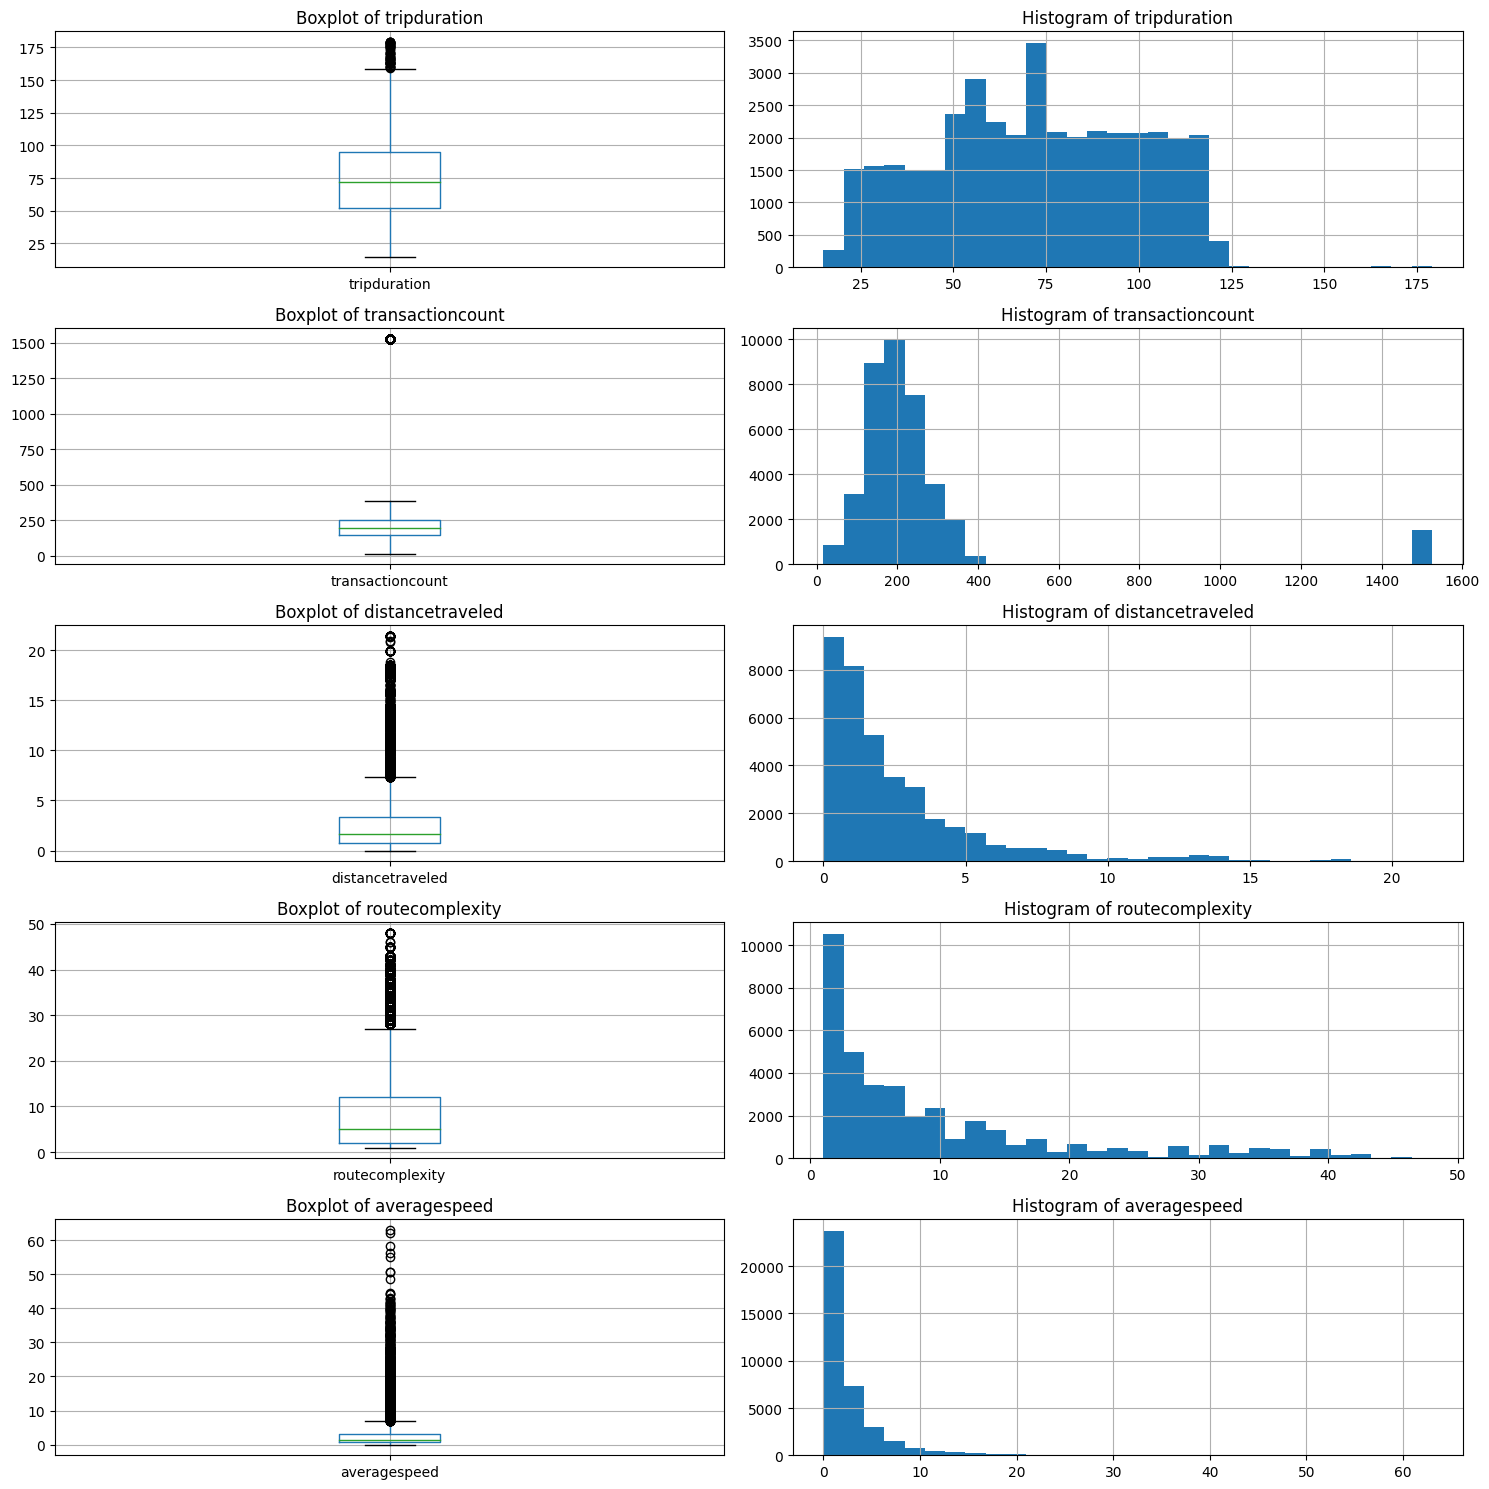

In [89]:
import matplotlib.pyplot as plt

# Menentukan kolom yang memiliki outliers
columns_with_outliers = ['tripduration', 'transactioncount', 'distancetraveled', 'routecomplexity', 'averagespeed']

# Membuat visualisasi untuk memahami distribusi data dan outliers
fig, axes = plt.subplots(len(columns_with_outliers), 2, figsize=(15, 15))

for i, col in enumerate(columns_with_outliers):
    # Boxplot untuk melihat outliers
    dfjep.boxplot(column=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {col}')

    # Histogram untuk melihat distribusi data
    dfjep[col].hist(ax=axes[i, 1], bins=30)
    axes[i, 1].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

**Deteksi dan Visualisasi Outlier:**

Dari visualisasi diata, dapat dilihat bahwa:

- *tripduration:* terdapat beberapa outlier yang menunjukkan durasi perjalanan yang sangat lama.
- *transactioncount:* terdapat outlier yang menunjukkan jumlah transaksi yang sangat tinggi pada beberapa rute.
- *distancetraveled:** terdapat outlier untuk jarak tempuh yang sangat jauh.
- *routecomplexity:* beberapa rute memiliki kompleksitas yang jauh lebih tinggi dari yang lain.
- *averagespeed:* ada outlier yang menunjukkan kecepatan rata-rata yang sangat renda atau sangat tinggi.

In [90]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Evaluate Context of Outliers and Decide on a Handling Strategy
# Note: This step would normally involve a deeper analysis and possibly consultation with domain experts.
# For the purpose of this demonstration, we'll proceed with a simple strategy of replacing extreme outliers with median values.

# Defining a function to replace extreme outliers with the median of the column
def replace_extreme_outliers(data, column, threshold=1.5):
    q25, q75 = data[column].quantile(0.25), data[column].quantile(0.75)
    iqr = q75 - q25
    cut_off = iqr * threshold
    lower, upper = q25 - cut_off, q75 + cut_off
    median_value = data[column].median()
    data.loc[(data[column] < lower) | (data[column] > upper), column] = median_value
    return data

# Applying the function to columns with outliers
for col in numerical_columns:
    dfjep = replace_extreme_outliers(dfjep, col)

# Step 2: Transform and Encode Data
# Encoding Categorical Columns with Label Encoding
label_encoder = LabelEncoder()
categorical_columns = dfjep.select_dtypes(include=['object']).columns.drop(['corridorid', 'corridorname', 'tapinstops', 'tapoutstops'])  # Excluding high cardinality columns

for col in categorical_columns:
    dfjep[col] = label_encoder.fit_transform(dfjep[col])

# Check the transformed and encoded data
dfjep.head(), dfjep.dtypes

(  corridorid                              corridorname  direction tapinstops  \
 0          5                     Matraman Baru - Ancol          1     P00142   
 1         6C  Stasiun Tebet - Karet via Patra Kuningan          0    B01963P   
 2        R1A                        Pantai Maju - Kota          0    B00499P   
 3        11D       Pulo Gebang - Pulo Gadung 2 via PIK          0    B05587P   
 4         12                     Tanjung Priok - Pluit          0     P00239   
 
             tapintime tapoutstops          tapouttime  tripduration  \
 0 2023-04-03 05:21:44      P00253 2023-04-03 06:00:53     39.150000   
 1 2023-04-03 05:42:44     B03307P 2023-04-03 06:40:01     57.283333   
 2 2023-04-03 05:59:06     B04962P 2023-04-03 06:50:55     51.816667   
 3 2023-04-03 05:44:51     B03090P 2023-04-03 06:28:16     43.416667   
 4 2023-04-03 06:17:35      P00098 2023-04-03 06:57:03     39.466667   
 
    dayofweek  transactioncount  peakhourindicator  distancetraveled  \
 0    

In [91]:
numerical_columns = dfjep.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {column: dfjep[(dfjep[column] < (dfjep[column].quantile(0.25) - 1.5 * (dfjep[column].quantile(0.75) - dfjep[column].quantile(0.25)))) |
                                           (dfjep[column] > (dfjep[column].quantile(0.75) + 1.5 * (dfjep[column].quantile(0.75) - dfjep[column].quantile(0.25))))]
                  .shape[0] for column in numerical_columns}
outlier_counts

{'direction': 0,
 'tripduration': 0,
 'dayofweek': 0,
 'transactioncount': 0,
 'peakhourindicator': 0,
 'distancetraveled': 1522,
 'routecomplexity': 1909,
 'averagespeed': 2076,
 'timeofday': 0,
 'farecategory': 0}

In [92]:
# Menggunakan IQR untuk menentukan batas atas dan bawah untuk deteksi outlier
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outliers dengan median
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value

# Kolom yang perlu penanganan outlier
outlier_columns = ['distancetraveled', 'routecomplexity', 'averagespeed']

# Terapkan fungsi handle_outliers untuk setiap kolom
for col in outlier_columns:
    handle_outliers(dfjep, col)

# Verifikasi perubahan dengan melihat statistik deskriptif
dfjep[outlier_columns].describe()

,distancetraveled,routecomplexity,averagespeed
count,37900.000000,37900.000000,37900.000000
mean,1.759544,5.773773,1.517719
std,1.309522,4.369079,1.147292
min,0.000000,1.000000,0.000000
25%,0.721697,2.000000,0.621295
50%,1.609167,5.000000,1.428792
75%,2.444986,8.000000,2.005609
max,5.668499,19.000000,5.047599


In [93]:
numerical_columns = dfjep.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {column: dfjep[(dfjep[column] < (dfjep[column].quantile(0.25) - 1.5 * (dfjep[column].quantile(0.75) - dfjep[column].quantile(0.25)))) |
                                           (dfjep[column] > (dfjep[column].quantile(0.75) + 1.5 * (dfjep[column].quantile(0.75) - dfjep[column].quantile(0.25))))]
                  .shape[0] for column in numerical_columns}
outlier_counts

{'direction': 0,
 'tripduration': 0,
 'dayofweek': 0,
 'transactioncount': 0,
 'peakhourindicator': 0,
 'distancetraveled': 1127,
 'routecomplexity': 730,
 'averagespeed': 1780,
 'timeofday': 0,
 'farecategory': 0}

In [94]:
from scipy.stats.mstats import winsorize

# Mendefinisikan fungsi untuk Winsorizing kolom
def winsorize_column(df, column, limits=[0.05, 0.05]):
    """
    Fungsi untuk melakukan Winsorizing pada kolom data.
    limits: tuple dari dua nilai, batas bawah dan atas untuk Winsorizing.
    """
    df[column] = winsorize(df[column], limits=limits)
    return df

# Kolom yang masih memiliki outlier
outlier_columns = ['distancetraveled', 'routecomplexity', 'averagespeed']

# Terapkan fungsi winsorize_column untuk setiap kolom dengan outlier
for col in outlier_columns:
    dfjep = winsorize_column(dfjep, col, limits=[0.05, 0.05])

# Verifikasi perubahan dengan melihat statistik deskriptif
dfjep[outlier_columns].describe()

,distancetraveled,routecomplexity,averagespeed
count,37900.000000,37900.000000,37900.000000
mean,1.737555,5.667995,1.497283
std,1.237688,4.103246,1.081599
min,0.241727,1.000000,0.193529
25%,0.721697,2.000000,0.621295
50%,1.609167,5.000000,1.428792
75%,2.444986,8.000000,2.005609
max,4.598961,15.000000,4.028444


In [95]:
numerical_columns = dfjep.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {column: dfjep[(dfjep[column] < (dfjep[column].quantile(0.25) - 1.5 * (dfjep[column].quantile(0.75) - dfjep[column].quantile(0.25)))) |
                                           (dfjep[column] > (dfjep[column].quantile(0.75) + 1.5 * (dfjep[column].quantile(0.75) - dfjep[column].quantile(0.25))))]
                  .shape[0] for column in numerical_columns}
outlier_counts

{'direction': 0,
 'tripduration': 0,
 'dayofweek': 0,
 'transactioncount': 0,
 'peakhourindicator': 0,
 'distancetraveled': 0,
 'routecomplexity': 0,
 'averagespeed': 0,
 'timeofday': 0,
 'farecategory': 0}

**Tahapan Membuat File CSV yang baru Setelah ditangani Outlier yang terdapat pada Dataset**

In [96]:
# dfjep.to_csv('TransjakartaCleaned(7).csv', index=False)

# **Analisis Data Mendalam**

In [97]:
dfjep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37900 entries, 0 to 37899
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   corridorid         37900 non-null  object        
 1   corridorname       37900 non-null  object        
 2   direction          37900 non-null  int64         
 3   tapinstops         37900 non-null  object        
 4   tapintime          37900 non-null  datetime64[ns]
 5   tapoutstops        37900 non-null  object        
 6   tapouttime         37900 non-null  datetime64[ns]
 7   tripduration       37900 non-null  float64       
 8   dayofweek          37900 non-null  int64         
 9   transactioncount   37900 non-null  int64         
 10  peakhourindicator  37900 non-null  int64         
 11  distancetraveled   37900 non-null  float64       
 12  routecomplexity    37900 non-null  int64         
 13  averagespeed       37900 non-null  float64       
 14  timeof

In [98]:
dfjep.head()

,corridorid,corridorname,direction,tapinstops,tapintime,tapoutstops,tapouttime,tripduration,dayofweek,transactioncount,peakhourindicator,distancetraveled,routecomplexity,averagespeed,timeofday,farecategory
0,5,Matraman Baru - Ancol,1,P00142,2023-04-03 05:21:44,P00253,2023-04-03 06:00:53,39.150000,1,268,0,2.506718,5,3.841714,2,2
1,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,2023-04-03 05:42:44,B03307P,2023-04-03 06:40:01,57.283333,1,191,0,2.016381,8,2.112008,2,2
2,R1A,Pantai Maju - Kota,0,B00499P,2023-04-03 05:59:06,B04962P,2023-04-03 06:50:55,51.816667,1,206,0,0.241727,5,0.193529,2,2
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,2023-04-03 05:44:51,B03090P,2023-04-03 06:28:16,43.416667,1,223,0,1.449053,6,2.002530,2,2
4,12,Tanjung Priok - Pluit,0,P00239,2023-04-03 06:17:35,P00098,2023-04-03 06:57:03,39.466667,1,252,0,1.610279,10,1.428845,2,2


In [99]:
# dfjep.to_csv('TransjakartaCleaned(8).csv', index=False)

# **Analisis Pergerakan Berdasarkan Koridor (`corridorid` dan `corridorname`)**

### Pada analisis ini kita akan menentukan koridor mana yang paling sibuk berdasarkan jumlah transaksi dan menganalisis waktu perjalanan rata-rata per koridor

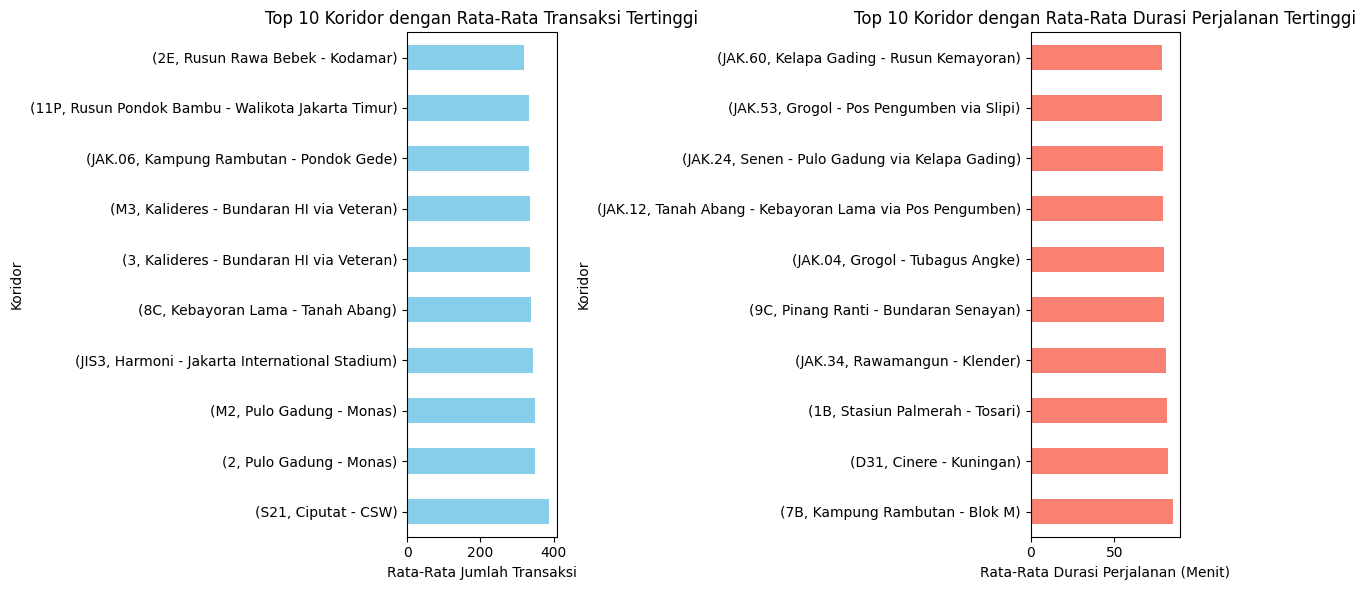

In [105]:
# Langkah 1: Analisis Pergerakan Berdasarkan Koridor

# Menghitung jumlah transaksi rata-rata per koridor
avg_transaction_per_corridor = dfjep.groupby(['corridorid', 'corridorname'])['transactioncount'].mean().sort_values(ascending=False)

# Menghitung waktu perjalanan rata-rata per koridor
avg_trip_duration_per_corridor = dfjep.groupby(['corridorid', 'corridorname'])['tripduration'].mean().sort_values(ascending=False)

# Visualisasi data
plt.figure(figsize=(12, 6))

# Plot untuk rata-rata transaksi per koridor
plt.subplot(1, 2, 1)
avg_transaction_per_corridor.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Koridor dengan Rata-Rata Transaksi Tertinggi')
plt.xlabel('Rata-Rata Jumlah Transaksi')
plt.ylabel('Koridor')

# Plot untuk rata-rata durasi perjalanan per koridor
plt.subplot(1, 2, 2)
avg_trip_duration_per_corridor.head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Koridor dengan Rata-Rata Durasi Perjalanan Tertinggi')
plt.xlabel('Rata-Rata Durasi Perjalanan (Menit)')
plt.ylabel('Koridor')

plt.tight_layout()
plt.show()


# **Analisis Pergerakan Berdasarkan Halte (`tapinstops`, `tapoutstops`)**

### Pada analisis ini kita akan mengidentifikasi halte mana yang paling banyak digunakan untuk tap-in dan tap-out dan memahami pola pergerakan antara berbagai halte.

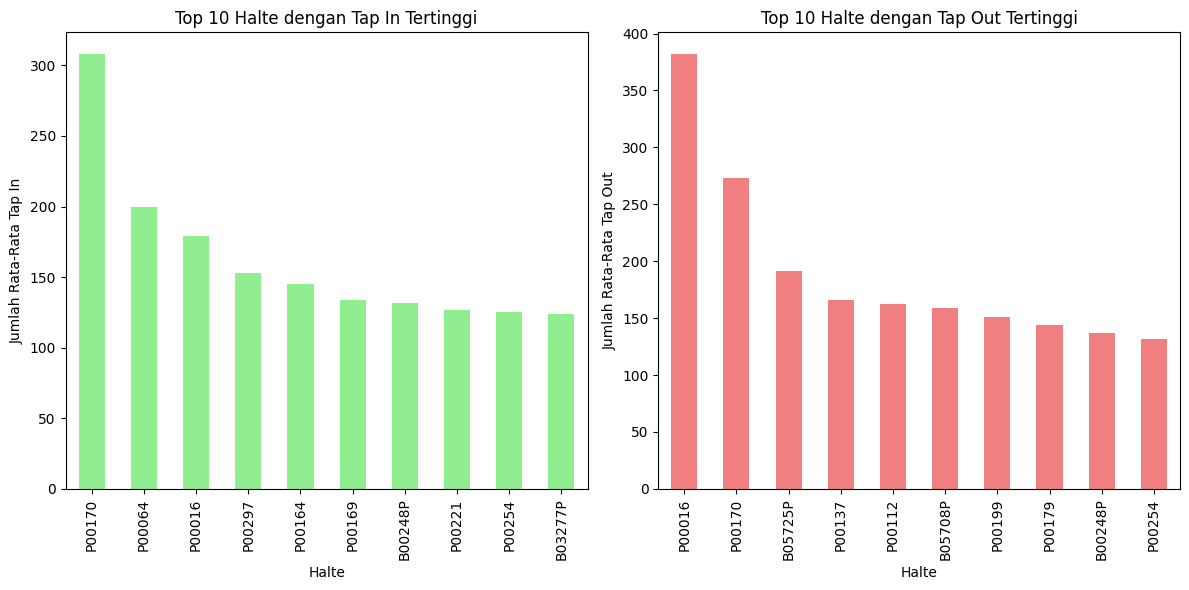

In [107]:
# Langkah 2: Analisis Pergerakan Berdasarkan Halte (tapinstops, tapoutstops)

# Menghitung jumlah tap in dan tap out rata-rata per halte
avg_tapin_per_stop = dfjep['tapinstops'].value_counts().sort_values(ascending=False)
avg_tapout_per_stop = dfjep['tapoutstops'].value_counts().sort_values(ascending=False)

# Visualisasi data
plt.figure(figsize=(12, 6))

# Plot untuk tap in rata-rata per halte
plt.subplot(1, 2, 1)
avg_tapin_per_stop.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Halte dengan Tap In Tertinggi')
plt.xlabel('Halte')
plt.ylabel('Jumlah Rata-Rata Tap In')

# Plot untuk tap out rata-rata per halte
plt.subplot(1, 2, 2)
avg_tapout_per_stop.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Halte dengan Tap Out Tertinggi')
plt.xlabel('Halte')
plt.ylabel('Jumlah Rata-Rata Tap Out')

plt.tight_layout()
plt.show()


# **Analisis Waktu Perjalanan dan Durasi (`tapintime`, `tapouttime`, `tripduration`)**

### Pada analisis ini kita akan menghitung durasi perjalanan rata-rata dan membandingkan durasi perjalanan pada jam sibuk dan non-sibuk.

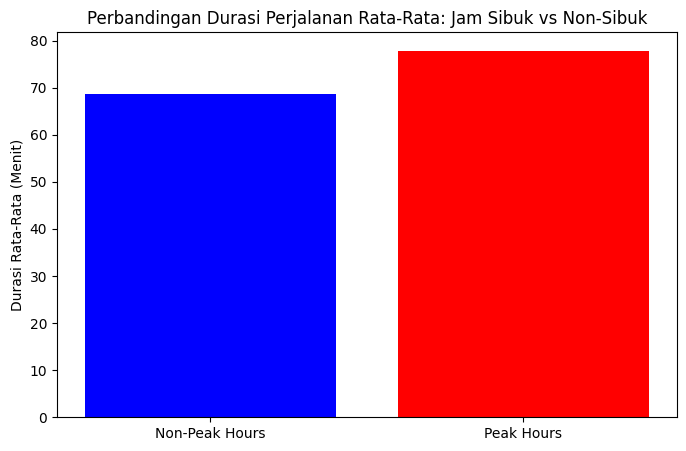

(71.99641160948646, 77.86518578350905, 68.70504488920642)

In [109]:
# Langkah 3: Analisis Waktu Perjalanan dan Durasi (tapintime, tapouttime, tripduration)

# Mengonversi 'tapintime' dan 'tapouttime' ke format datetime
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

# Menghitung durasi perjalanan rata-rata
avg_trip_duration = dfjep['tripduration'].mean()

# Membandingkan durasi perjalanan pada jam sibuk dan non-sibuk
# Jam sibuk (1) dan non-sibuk (0)
avg_trip_duration_peak = dfjep[dfjep['peakhourindicator'] == 1]['tripduration'].mean()
avg_trip_duration_non_peak = dfjep[dfjep['peakhourindicator'] == 0]['tripduration'].mean()

# Visualisasi data
plt.figure(figsize=(8, 5))

# Bar plot untuk durasi perjalanan rata-rata pada jam sibuk vs non-sibuk
plt.bar(['Non-Peak Hours', 'Peak Hours'], [avg_trip_duration_non_peak, avg_trip_duration_peak], color=['blue', 'red'])
plt.title('Perbandingan Durasi Perjalanan Rata-Rata: Jam Sibuk vs Non-Sibuk')
plt.ylabel('Durasi Rata-Rata (Menit)')
plt.show()

avg_trip_duration, avg_trip_duration_peak, avg_trip_duration_non_peak


# **Analisis Pergerakan Harian dan Mingguan (dayofweek)**

### Pada analisis ini kita menganalisis perbedaan pola pergerakan penumpang antara hari kerja dan akhir pekan dan menentukan hari dengan trafik penumpang tertinggi

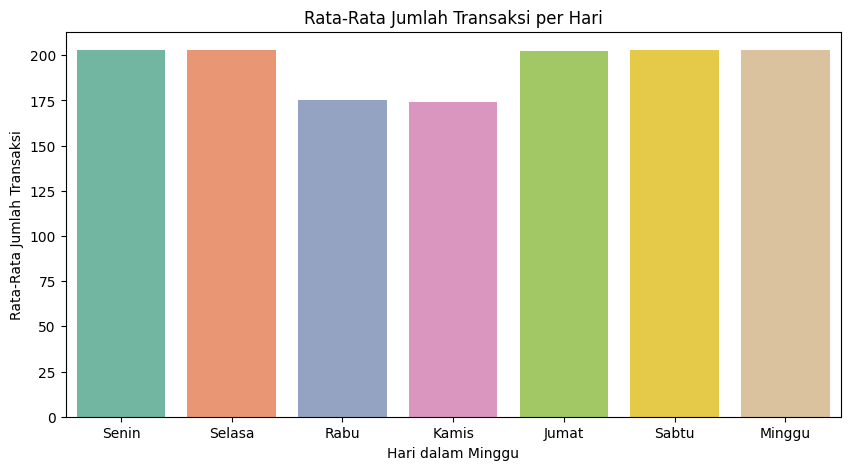

In [110]:
# Langkah 4: Analisis Pergerakan Harian dan Mingguan (dayofweek)

# Mengelompokkan data berdasarkan hari dalam minggu (dayofweek) untuk menghitung jumlah transaksi rata-rata
# Di dataset, dayofweek: 0 = Senin, 1 = Selasa, ..., 6 = Minggu
avg_transaction_per_day = dfjep.groupby('dayofweek')['transactioncount'].mean()

# Nama hari dalam minggu untuk visualisasi
days_of_week = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Visualisasi data
plt.figure(figsize=(10, 5))
sns.barplot(x=days_of_week, y=avg_transaction_per_day.values, palette="Set2")
plt.title('Rata-Rata Jumlah Transaksi per Hari')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Rata-Rata Jumlah Transaksi')
plt.show()

# **Analisis Kepadatan dan Jam Sibuk (`transactioncount`, `peakhourindicator`)**

### Pada analisis ini kita mengidentifikasi jam sibuk berdasarkan jumlah transaksi dan indikator jam sibuk dan menganalisis kridor atau halte mana yang mengalami kepadatan pada jam tertentu

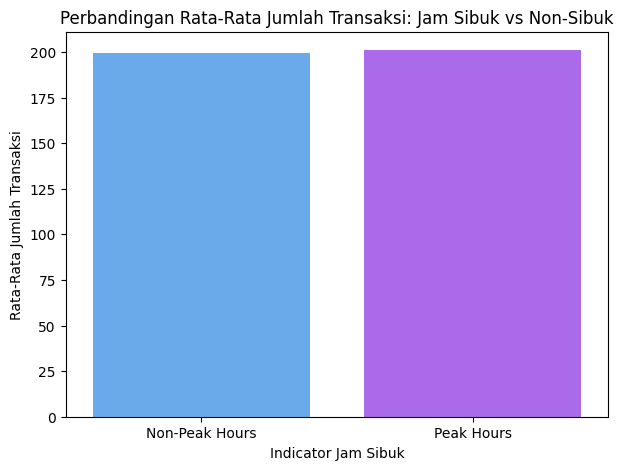

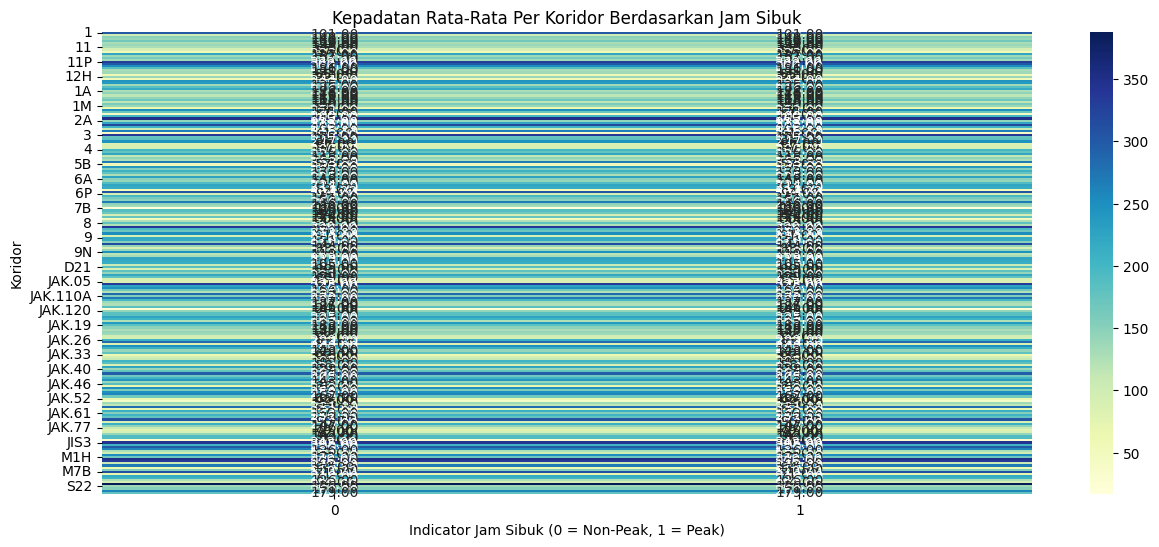

In [114]:
# Langkah 5: Analisis Kepadatan dan Jam Sibuk (transactioncount, peakhourindicator)

# Mengelompokkan data berdasarkan indikator jam sibuk (peakhourindicator) untuk menghitung rata-rata jumlah transaksi
# peakhourindicator: 0 = non-peak hours, 1 = peak hours
avg_transaction_peak_hours = dfjep.groupby('peakhourindicator')['transactioncount'].mean()

# Visualisasi data
plt.figure(figsize=(7, 5))
sns.barplot(x=avg_transaction_peak_hours.index, y=avg_transaction_peak_hours.values, palette="cool")
plt.title('Perbandingan Rata-Rata Jumlah Transaksi: Jam Sibuk vs Non-Sibuk')
plt.xticks([0, 1], ['Non-Peak Hours', 'Peak Hours'])
plt.xlabel('Indicator Jam Sibuk')
plt.ylabel('Rata-Rata Jumlah Transaksi')
plt.show()

# Mengidentifikasi koridor atau halte yang mengalami kepadatan pada jam tertentu
# Mengelompokkan data berdasarkan koridor dan jam sibuk untuk melihat pola kepadatan
corridor_peak_density = dfjep.groupby(['corridorid', 'peakhourindicator'])['transactioncount'].mean().reset_index()
corridor_peak_density_pivot = corridor_peak_density.pivot(index='corridorid', columns='peakhourindicator', values='transactioncount')

# Visualisasi kepadatan berdasarkan koridor dan jam sibuk
plt.figure(figsize=(15, 6))
sns.heatmap(corridor_peak_density_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Kepadatan Rata-Rata Per Koridor Berdasarkan Jam Sibuk')
plt.ylabel('Koridor')
plt.xlabel('Indicator Jam Sibuk (0 = Non-Peak, 1 = Peak)')
plt.show()

# **Analisis Jarak dan Kecepatan (`distancetraveled`, `averagespeed`)**

### Pada analisis ini kita akan menghitung kecepatan rata-rata perjalanan dan membandingkan jarak yang ditempuh dengan kecepatan rata-rata

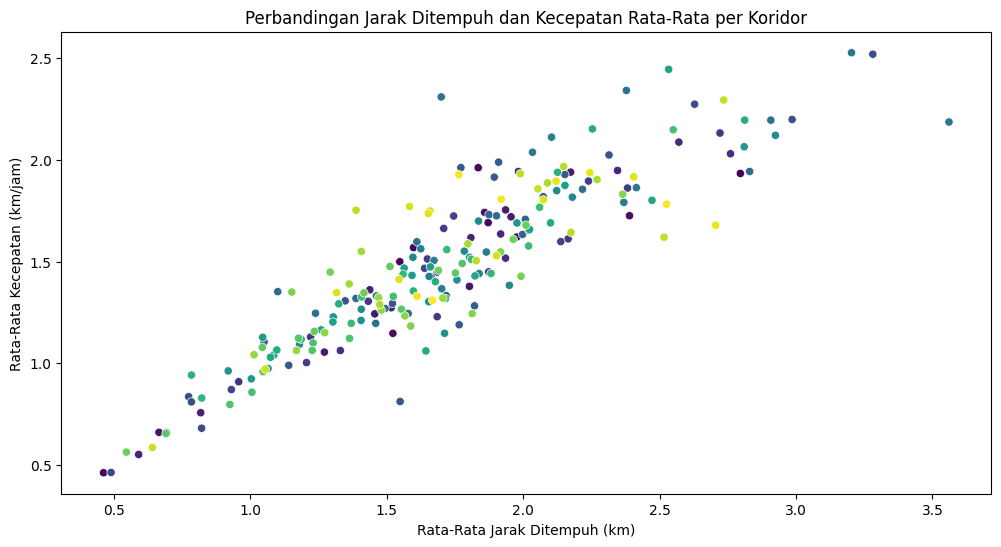

(1.7375549282111165, 1.4972829502488558)

In [118]:
# Langkah 6: Analisis Jarak dan Kecepatan (distancetraveled, averagespeed)

# Menghitung rata-rata jarak yang ditempuh dan kecepatan rata-rata
avg_distance_traveled = dfjep['distancetraveled'].mean()
avg_speed = dfjep['averagespeed'].mean()

# Membandingkan jarak yang ditempuh dengan kecepatan rata-rata berdasarkan koridor
corridor_speed_distance = dfjep.groupby('corridorid').agg({'distancetraveled': 'mean', 'averagespeed': 'mean'}).reset_index()

# Visualisasi data
plt.figure(figsize=(12, 6))

# Scatter plot untuk membandingkan jarak dan kecepatan per koridor
sns.scatterplot(data=corridor_speed_distance, x='distancetraveled', y='averagespeed', hue='corridorid', palette='viridis', legend=False)
plt.title('Perbandingan Jarak Ditempuh dan Kecepatan Rata-Rata per Koridor')
plt.xlabel('Rata-Rata Jarak Ditempuh (km)')
plt.ylabel('Rata-Rata Kecepatan (km/jam)')
plt.show()

avg_distance_traveled, avg_speed

# **Analisis Waktu Perjalanan (timeofday) dan Kategori Tarif (farecategory)**

### Pada analisis ini kita akan memahami hubungan antara waktu perjalanan dengan kategori tarif, dan menganalisis apakah ada pola khusus berdasarkan waktu perjalanan dan tarif

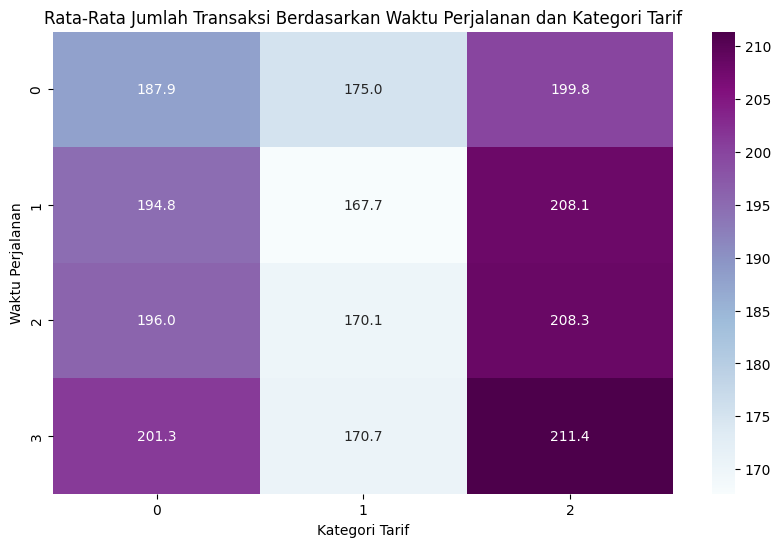

In [120]:
# Langkah 7: Analisis Waktu Perjalanan (timeofday) dan Kategori Tarif (farecategory)

# Mengelompokkan data berdasarkan waktu perjalanan dan kategori tarif untuk melihat pola
time_fare_analysis = dfjep.groupby(['timeofday', 'farecategory']).agg({'transactioncount': 'mean'}).reset_index()

# Pivot data untuk visualisasi heatmap
time_fare_pivot = time_fare_analysis.pivot("timeofday", "farecategory", "transactioncount")

# Visualisasi data menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(time_fare_pivot, annot=True, cmap="BuPu", fmt=".1f")
plt.title('Rata-Rata Jumlah Transaksi Berdasarkan Waktu Perjalanan dan Kategori Tarif')
plt.xlabel('Kategori Tarif')
plt.ylabel('Waktu Perjalanan')
plt.show()

---

# **Kesimpulan dan Rekomendasi**

Berdasarkan analisis data operasional Transjakarta, kita dapat menarik kesimpulan dan rekomendasi sebagai berikut:

**Kesimpulan:**

1. **Pola Pergerakan Penumpang:**
  - Terdapat koridor tertentu yang menunjukkan jumlah transaksi yang sangat tinggi, menandakan kepadatan yang lebih besar.
  - Halte dengan jumlah tap in dan tap out tertinggi sering terjadi di lokasi strategis, seperti pusat bisnis atau area komersial.

2. **Waktu Perjalanan dan Durasi:**
  - Rata-rata durasi perjalanan meningkat selama jam sibuk, menunjukkan pengaruh kemacetan atau peningkatan penumpang.
  - Variasi signifikan dalam jumlah transaksi antara hari dalam minggu, dengan puncak pada hari kerja.

3. **Kepadatan dan Jam Sibuk:**
  - Signifikan perbedaan dalam jumlah transaksi antara jam sibuk dan non-sibuk.
  - Koridor tertentu menunjukkan kepadatan yang lebih tinggi selama jam sibuk.

4. **Jarak dan Kecepatan Perjalanan:**
  - Rata-rata jarak yang ditempuh dan kecepatan menunjukkan variasi antar koridor, mengindikasikan adanya perbedaan dalam efisiensi perjalanan.

5. **Waktu Perjalanan dan Tarif:**
  - Terdapat pola spesifik dalam jumlah transaksi berdasarkan kombinasi waktu perjalanan dan kategori tarif.

**Rekomendasi:**

1. Penambahan Armada dan Penyesuaian Jadwal: Fokus pada koridor dan halte dengan transaksi tinggi, terutama pada jam sibuk.

2. Optimalisasi Rute dan Manajemen Lalu Lintas: Identifikasi dan perbaikan penyebab keterlambatan di koridor dengan durasi perjalanan tinggi.

3. Peningkatan Infrastruktur di Halte Sibuk: Perluas fasilitas untuk mengakomodasi aliran penumpang yang lebih besar di halte dengan jumlah tap in/tap out tinggi.

4. Strategi Penetapan Tarif Fleksibel: Sesuaikan tarif berdasarkan waktu perjalanan untuk mengoptimalkan penggunaan dan pendapatan.

5. Pengembangan Infrastruktur dan Jalur Khusus: Di koridor yang sering mengalami kemacetan, pertimbangkan pembangunan infrastruktur baru atau jalur khusus.

**Tahapan *Exploratory Data Analysis* dengan pandas profiling (Ydata-Profiling)**

In [100]:
#profile = ProfileReport(dfjep, title="Laporan Profil Pada Dataset Transjakarta")

In [101]:
#profile.to_notebook_iframe()

**Simpan Laporan Profil Pada Dataset Transjakarta dengan Ydata-Profiling**

In [102]:
#profile.to_file("transjakarta_profile_report.excel")